In [97]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [115]:
%%time
레시피_ = pd.read_csv('레시피_메타정보_raw.csv', parse_dates=['등록일','수정일'])
유저_ = pd.read_csv('유저_메타정보_raw.csv')
재료_ = pd.read_csv('재료_메타정보_raw.csv')
재료 = pd.read_csv('레시피_재료_내용_raw.csv',dtype={'재료_아이디': object})
순서 = pd.read_csv('레시피_순서_내용_raw.csv')
태그 = pd.read_csv('레시피_태그_내용_raw.csv')
후기 = pd.read_csv('레시피_유저_내용_raw.csv', parse_dates=['등록일'])
분류 = pd.read_csv('레시피_분류_내용_raw.csv')

Wall time: 18.2 s


In [132]:
후기

,레시피_아이디,유저_아이디,레시피_유저_순번,별점,등록일,내용,이미지
0,100014,77253045,1,5,2017-06-08 19:24:49,레시피대로 따라서 맛있게먹 고있어요~~^^감사합니다,NaN
1,1000637,ina521,1,5,2017-06-11 11:41:00,레시피감사해요잘만들어먹었네요^^,NaN
2,1001360,khea0628,1,5,2017-06-09 12:24:56,너무 맛있게 해먹었습니다. 양도 푸짐하고.. 국물도 끝내주고... 영양만점인듯해요당...,NaN
3,1001902,18187133,1,5,2016-12-23 17:17:45,지금 만드는중인데. 맛있을것 같아요,NaN
4,1002049,80221089,1,3,2017-01-19 07:21:09,오늘 만들어봤는데 간단하고 재료도 많이 필요없어서 노무 좋았어요! 크림이 너무 많았...,NaN
...,...,...,...,...,...,...,...
368524,6908390,10251040,9,5,2020-06-01 12:58:02,간단하고 맛도 좋아요,NaN
368525,6908390,jeungi4860,10,5,2019-07-09 12:16:53,잘만들어먹엇어여~,NaN
368526,6908390,41379274,11,5,2020-09-28 21:28:38,잘 해먹었습니다^^,NaN
368527,6908397,26773485,1,5,2020-01-31 08:27:02,비쥬얼 좋아요 잘먹었습니다,NaN


In [121]:
레시피_['난이도'].unique()

array([nan, '초급', '중급', '아무나', '고급', '신의경지'], dtype=object)

In [127]:
유저_

,유저_아이디,유저_닉네임,유저_이미지
0,0000choi,꼬마은영,https://recipe1.ezmember.co.kr/cache/rpf/2014/...
1,000820,커피쪼앙,https://recipe1.ezmember.co.kr/img/df/pf_100_1...
2,001212jm,조수현,https://recipe1.ezmember.co.kr/cache/rpf/2014/...
3,001212jm,정민맘,https://recipe1.ezmember.co.kr/cache/rpf/2014/...
4,002joy,레아맘,https://recipe1.ezmember.co.kr/img/df/pf_100_1...
...,...,...,...
136299,zzz3450,자매마밍,https://recipe1.ezmember.co.kr/img/df/pf_100_1...
136300,zzz6230,su,https://recipe1.ezmember.co.kr/img/df/pf_100_1...
136301,zzzqhdud,ㅎㅎ,https://recipe1.ezmember.co.kr/img/df/pf_100_1...
136302,zzzzz,후요,https://recipe1.ezmember.co.kr/img/df/pm_100_1...


In [130]:
후기[후기['유저_아이디'].isin([i for i in 유저_['유저_닉네임'] if str(i).endswith('맘')])]

,레시피_아이디,유저_아이디,레시피_유저_순번,별점,등록일,내용,이미지


In [131]:
후기.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368529 entries, 0 to 368528
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   레시피_아이디    368529 non-null  int64 
 1   유저_아이디     368529 non-null  object
 2   레시피_유저_순번  368529 non-null  int64 
 3   별점         368529 non-null  int64 
 4   등록일        368529 non-null  object
 5   내용         368466 non-null  object
 6   이미지        119289 non-null  object
dtypes: int64(3), object(4)
memory usage: 19.7+ MB


In [122]:
레시피_[레시피_['난이도'] == '신의경지']

,레시피_아이디,조회수,레시피_메인이미지,유저_아이디,제목,등록일,수정일,요약,인원수,소요시간,난이도
15328,2488158,12398,https://recipe1.ezmember.co.kr/cache/recipe/20...,cggirl1004,알록달록 색동저고리떡과 복주머니떡,2011-02-05,2015-08-17,선물로 좋은 쪽든하고 달콤한 색동저고리떡과 복주머니떡입니다.,6인분 이상,120분 이내,신의경지
18928,3441973,88230,https://recipe1.ezmember.co.kr/cache/recipe/20...,kjo2456,해장국집 차려도 되겠다!!라고 남편에게 칭찬받은 선지해장국,2012-03-05,2015-04-15,정말정말 담백하고 맛있는 선지해장국! 술해장은 물론 철분섭취가 필요할 때 딱입니다 ^^,6인분 이상,NaN,신의경지
18960,3450138,56056,https://recipe1.ezmember.co.kr/cache/recipe/20...,kjo2456,먹어도 먹어도 또 먹고 싶은 맛~ 뼈찜,2012-03-07,2015-04-22,돼지등뼈 해장국은 누린내가 나서 싫다는 분들~~~ 이 뼈찜은 냄새가 나지 않아 좋아...,5인분,2시간 이상,신의경지
23415,4737297,119230,https://recipe1.ezmember.co.kr/cache/recipe/20...,smy0202,쑥버무리 만드는법 쑥요리,2013-04-09,2015-04-20,할머니가 해주신던 쑥버무리 만드는법입니다.,NaN,NaN,신의경지
25457,5295466,60976,https://recipe1.ezmember.co.kr/cache/recipe/20...,bibary,소갈비찜 맛있게 만드는 방법,2013-09-17,2015-04-10,추석에 각 가정마다 만들어 먹는 소갈비찜이에요. 햇밤 가득 넣어서 알록달록 푸짐하게...,NaN,NaN,신의경지
...,...,...,...,...,...,...,...,...,...,...,...
157388,6959608,523,https://recipe1.ezmember.co.kr/cache/recipe/20...,23678112,콩과 쌀로 만든 고기... 건강한 맛이군요.,2021-06-05,2021-06-07,요리법도 간단하고 맛있고 건강한맛의 콩단백요리~~\n자주 해먹고 싶어집니다.,4인분,30분 이내,신의경지
158212,6960466,3179,https://recipe1.ezmember.co.kr/cache/recipe/20...,minja777711,배추김치 겉절이,2021-06-19,2021-06-21,여름철에 입맛 도구는\n홍고추를 갈아 만든\n강원도 고랭지 배추에 \n열무를 한다발...,4인분,120분 이내,신의경지
158899,6961181,1953,https://recipe1.ezmember.co.kr/cache/recipe/20...,fanyloveh2,오징어볶음 양념으로 오징어덮밥 만드는 법,2021-07-04,2021-07-05,타우린성분이 들어있어 피로회복에 좋은 오징어덮밥이에요~^^,2인분,30분 이내,신의경지
161414,6963816,3343,https://recipe1.ezmember.co.kr/cache/recipe/20...,82938747,(더위)를 시원하게 날려줄 소고기 야채 모듬 버섯 수제비 샤브샤브 & 미나리 달걀죽,2021-08-22,2021-08-23,"무더위를 시원하게 날려줄 몸에 좋은 보양식이 무엇이 있을까 고민하던 중, 이열치열 ...",4인분,60분 이내,신의경지


In [119]:
레시피_

,레시피_아이디,조회수,레시피_메인이미지,유저_아이디,제목,등록일,수정일,요약,인원수,소요시간,난이도
0,13654,4115,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,바나나 고구마 셔벗,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
1,13655,2165,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,생선수프,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
2,13656,1777,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,밤대추 미음,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
3,13657,2011,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,바닐라 견과류 아이스크림,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
4,13998,6107,https://recipe1.ezmember.co.kr/cache/recipe/20...,magicgirl,감자스프,2005-06-15,2005-06-15,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
176454,6979664,47,https://recipe1.ezmember.co.kr/cache/recipe/20...,dudfhr79,훈제오리고기로 만드는 훈제오리주물럭 레시피!,NaT,2022-05-20,훈제오리고기로 만드는 훈제오리주물럭 레시피 입니다.,3인분,30분 이내,초급
176455,6979665,29,https://recipe1.ezmember.co.kr/cache/recipe/20...,jylhee070467,최고의 요리비결 부추전,2022-05-20,2022-05-20,"부추는 비타민의 보고라고 불릴 정도로 비타민 A, B1, B2, C 등이 풍부하고 ...",1인분,30분 이내,아무나
176456,6979666,14,https://recipe1.ezmember.co.kr/cache/recipe/20...,soylee1015,꽃 요리 아카시아꽃 튀김 향긋한 튀김,2022-05-20,2022-05-20,산에서 딴 아카시아 꽃으로 아카시아 꽃 튀김을 \n만들어 봅니다. 모양도 향기도 좋...,2인분,10분 이내,아무나
176457,6979667,49,https://recipe1.ezmember.co.kr/cache/recipe/20...,62929808,시원한 광어물회 맛있게 간단히 만들어 보세요.,2022-05-20,2022-05-20,시원한 광어물회 '이것' 넣어서 간편하고 맛있게 만들어 보세요.,1인분,15분 이내,아무나


In [117]:
재료_['재료_아이디']

,재료_아이디,재료_이름
0,1,시금치 부추(5-6줄기 또는)
1,1,시금치(포항초/노지시금치)
2,1,시금치(무쳐놓은거)
3,1,시금치 3분의
4,1,시금치 or 도라지등(다양한 나물)
...,...,...
47448,1050,핫도그번
47449,1050,비건핫도그빵
47450,1050,핫도그용빵
47451,1050,핫도그번 (상온)


In [118]:
for i in 재료_['재료_아이디'].unique():
    print(i)
    display(재료_[재료_['재료_아이디'] == i].head(2))

1


,재료_아이디,재료_이름
0,1,시금치 부추(5-6줄기 또는)
1,1,시금치(포항초/노지시금치)


2


,재료_아이디,재료_이름
129,2,양파(갈아서)
130,2,다진양파(생략가능)


3


,재료_아이디,재료_이름
796,3,군고구마
797,3,고구마 작은것


4


,재료_아이디,재료_이름
1022,4,러셋 감자
1023,4,감자(中크기)


5


,재료_아이디,재료_이름
1477,5,홍 파프리카 각
1478,5,홍파프리카


6


,재료_아이디,재료_이름
2045,6,애호박 반개
2046,6,잘게 썰은 애호박


7


,재료_아이디,재료_이름
2162,7,오이 무침
2163,7,샐러드용 오이


8


,재료_아이디,재료_이름
2369,8,당근(색 내기용)
2370,8,당근 4cm크기


9


,재료_아이디,재료_이름
2712,9,케일
2713,9,케일 큰 것


10


,재료_아이디,재료_이름
2728,10,데친브로코롤리
2729,10,브로콜리줄기(생략가능)


11


,재료_아이디,재료_이름
2850,11,말린 근대
2851,11,근대


12


,재료_아이디,재료_이름
2858,12,청경채(큰거)
2859,12,청경채 약


13


,재료_아이디,재료_이름
2897,13,셀러리 줄기
2898,13,셀러리(줄기와 잎 포함)


14


,재료_아이디,재료_이름
2904,14,깻잎(깻잎바라)
2905,14,깻잎(작은 것)


15


,재료_아이디,재료_이름
3030,15,상추 또는 양배추
3031,15,상추 크게


16


,재료_아이디,재료_이름
3125,16,마늘쫑 장아찌
3126,16,마늘쫑 1줌=


17


,재료_아이디,재료_이름
3152,17,가지(소)
3153,17,직접 키운 가지


18


,재료_아이디,재료_이름
3243,18,무 1센티두께로 큼직하게
3244,18,절임총각 무


19


,재료_아이디,재료_이름
3835,19,미나리(잎부분만)
3836,19,미나리(2줄)


20


,재료_아이디,재료_이름
3914,20,채썬 양배추 공기밥
3915,20,양배추(채썰어넣거나쌈싸먹기)


21


,재료_아이디,재료_이름
4134,21,다진청피망
4135,21,빨강피망


22


,재료_아이디,재료_이름
4322,22,아스파라거스 -
4323,22,화이트 아스파라거스


23


,재료_아이디,재료_이름
4336,23,연근 8cm
4337,23,연근(소)


24


,재료_아이디,재료_이름
4405,24,생선언니 다진야채큐브 적채
4406,24,채썬 양배추와 적채


25


,재료_아이디,재료_이름
4419,25,우엉 손질 후
4420,25,우엉조림


26


,재료_아이디,재료_이름
4509,26,대파 두
4510,26,쫑쫑 썰은 대파(흰부분)


27


,재료_아이디,재료_이름
5635,27,연 생강
5636,27,편 생강


28


,재료_아이디,재료_이름
5898,28,통마늘(돼지등뼈삶기용)
5899,28,마늘 1톨~


29


,재료_아이디,재료_이름
6328,29,부추(쑥갓)
6329,29,다진 부추(파)


30


,재료_아이디,재료_이름
6544,30,쑥갓(생략)
6545,30,쑥갓 한줌


31


,재료_아이디,재료_이름
6584,31,배추(or 양배추)
6585,31,배추 면기에


32


,재료_아이디,재료_이름
6782,32,손질 아욱
6783,32,아욱 1mm


33


,재료_아이디,재료_이름
6801,33,빨간고추(큰것)
6802,33,홍고추 큰거


34


,재료_아이디,재료_이름
7224,34,텃밭 열무
7225,34,어린열무


35


,재료_아이디,재료_이름
7283,35,적 치커리
7284,35,청 치커리


36


,재료_아이디,재료_이름
7301,36,마른 더덕
7302,36,더덕(or도라지)


37


,재료_아이디,재료_이름
7327,37,홍 도라지
7328,37,백 도라지


38


,재료_아이디,재료_이름
7377,38,▶ 재료 : 죽순
7378,38,삶은 죽순(없으면 생략가능)


39


,재료_아이디,재료_이름
7407,39,토란 작은것
7408,39,토란 데친것


40


,재료_아이디,재료_이름
7419,40,고사리 불린것
7420,40,고사리 삶은 것


41


,재료_아이디,재료_이름
7458,41,양상추(로메인상추쓰시면 더욱좋아요.)
7459,41,홍고추 1개 양상추


43


,재료_아이디,재료_이름
7524,43,얇게 채 썬 비트
7525,43,비트 줄기


44


,재료_아이디,재료_이름
7563,44,콜라비 큰것
7564,44,콜라비 큰 것


45


,재료_아이디,재료_이름
7572,45,냉이 데친것
7573,45,냉이 (크게2줌)


46


,재료_아이디,재료_이름
7619,46,콩나물 데친 것
7620,46,콩나물 300g


47


,재료_아이디,재료_이름
7756,47,취나물 삶은것
7757,47,삶은 취나물


48


,재료_아이디,재료_이름
7801,48,두릅 굵은거
7802,48,두릅 순


49


,재료_아이디,재료_이름
7823,49,안동 마 (장마)
7824,49,마 분말


50


,재료_아이디,재료_이름
7851,50,토마토 중
7852,50,시판 토마토 퓨레


51


,재료_아이디,재료_이름
8140,51,홈메이드 숙주
8141,51,숙주(데친 후 다져서 물기 짠)


52


,재료_아이디,재료_이름
8203,52,표고버섯 분말가루
8204,52,생표고버섯 큰 것


53


,재료_아이디,재료_이름
8446,53,양송이버섯(crimini mushrooms)
8447,53,양송이버섯(30개정도)


54


,재료_아이디,재료_이름
8504,54,팽이버섯 다진거
8505,54,팽이버섯 큰 1봉지


55


,재료_아이디,재료_이름
8575,55,곤지 느타리버섯
8576,55,곤지7호 느타리버섯


56


,재료_아이디,재료_이름
8689,56,화이트 목이버섯
8690,56,목이버섯 불린것


57


,재료_아이디,재료_이름
8719,57,새송이버섯(다른 채소로 대체가능)
8720,57,새송이 큰것


58


,재료_아이디,재료_이름
8827,58,손질된 고등어(특大)
8828,58,손질한 고등어 한마리


59


,재료_아이디,재료_이름
8954,59,학 꽁치
8955,59,캔 꽁치


60


,재료_아이디,재료_이름
8971,60,손질 연어
8972,60,생연어 슬라이스


61


,재료_아이디,재료_이름
9060,61,생선파는언니 동태살
9061,61,손질한 동태


62


,재료_아이디,재료_이름
9114,62,쭈꾸미(데친것)
9115,62,주꾸미 삶은국물


63


,재료_아이디,재료_이름
9162,63,낙지 호롱
9163,63,낙지 작은 것


64


,재료_아이디,재료_이름
9218,64,​반건조 오징어
9219,64,작은생물 오징어


65


,재료_아이디,재료_이름
9497,65,반건조 가자미 2마리
9498,65,반건조 가자미 중간크기


66


,재료_아이디,재료_이름
9543,66,갈치 대
9544,66,갈치 대사이즈


67


,재료_아이디,재료_이름
9622,67,생선파는언니 대구살
9623,67,대구 중


68


,재료_아이디,재료_이름
9654,68,명태 코다리
9655,68,명태살전


69


,재료_아이디,재료_이름
9685,69,병어 소
9686,69,병어 순살


70


,재료_아이디,재료_이름
9696,70,우럭 삶은 물
9697,70,우럭 중간크기


71


,재료_아이디,재료_이름
9719,71,삼치 작은
9720,71,삼치 필레


72


,재료_아이디,재료_이름
9749,72,생선파는언니 임연수어
9750,72,이면수


73


,재료_아이디,재료_이름
9754,73,아나고 세꼬시
9755,73,꼼 장어


74


,재료_아이디,재료_이름
9794,74,전어
9795,74,전어(소)


75


,재료_아이디,재료_이름
9800,75,조기(굴비)
9801,75,조기


76


,재료_아이디,재료_이름
9827,76,건 문어 채
9828,76,문어 머리


77


,재료_아이디,재료_이름
9904,77,냉동 손질 한치
9905,77,한치 작은거


78


,재료_아이디,재료_이름
9917,78,새우 (중)
9918,78,새우대가리


79


,재료_아이디,재료_이름
10213,79,홍 게
10214,79,게 맛살


80


,재료_아이디,재료_이름
10233,80,손질한 가리비
10234,80,가리비


81


,재료_아이디,재료_이름
10257,81,석화
10258,81,훈제 굴


82


,재료_아이디,재료_이름
10319,82,손질한 꼬막
10320,82,피꼬막 or 꼬막


83


,재료_아이디,재료_이름
10379,83,손질 바지락
10380,83,깐 바지락살


84


,재료_아이디,재료_이름
10473,84,백합(모시조개)
10474,84,백합조개 큰것


85


,재료_아이디,재료_이름
10484,85,큰 전복
10485,85,전복 삶은물


86


,재료_아이디,재료_이름
10573,86,깐 재첩
10574,86,재첩


87


,재료_아이디,재료_이름
10575,87,얼린 홍합
10576,87,삶아둔 홍합


88


,재료_아이디,재료_이름
10628,88,미더덕 손질한 거
10629,88,미더덕(오만딩)


89


,재료_아이디,재료_이름
10635,89,다시마 한
10636,89,다시마 손바닥사이즈


90


,재료_아이디,재료_이름
11122,90,생미역(물미역)
11123,90,자른 건미역 크게


91


,재료_아이디,재료_이름
11244,91,파래 어린이주먹만한뭉치
11245,91,무친 파래


92


,재료_아이디,재료_이름
11282,92,매생이 건조 큐브
11283,92,건조 매생이 블럭


93


,재료_아이디,재료_이름
11308,93,톳 약
11309,93,톳 장아찌


94


,재료_아이디,재료_이름
11338,94,김 (파래or돌김 등)
11339,94,조미 김 또는 김밥용 구운 김


95


,재료_아이디,재료_이름
11543,95,쌀 작은
11544,95,쌀 또는 잡곡


96


,재료_아이디,재료_이름
11693,96,켈로그 현미 그래놀라
11694,96,불린 현미쌀


97


,재료_아이디,재료_이름
11745,97,삼색 보리
11746,97,보리 쌀가루


98


,재료_아이디,재료_이름
11763,98,재료: 찹쌀
11764,98,방앗간용 찹쌀


99


,재료_아이디,재료_이름
11857,99,귀리 잡곡빵
11858,99,볶은 귀리 가루


100


,재료_아이디,재료_이름
11874,100,기장 쌀
11875,100,불린 기장


101


,재료_아이디,재료_이름
11880,101,찰 수수
11881,101,수수 등 오곡


102


,재료_아이디,재료_이름
11891,102,조(기장)
11892,102,조


103


,재료_아이디,재료_이름
11893,103,옥수수 종이컵
11894,103,물기뺀 옥수수


104


,재료_아이디,재료_이름
12043,104,볶은 율무
12044,104,율무


105


,재료_아이디,재료_이름
12047,105,호밀
12048,105,호밀가루


106


,재료_아이디,재료_이름
12055,106,앉은뱅이 밀(중력분)
12056,106,스펠트 밀


107


,재료_아이디,재료_이름
12085,107,냉동 완두콩
12086,107,완두콩(생략 가능)


108


,재료_아이디,재료_이름
12119,108,흰 강낭콩(불린)
12120,108,흰 강낭콩 종이컵


110


,재료_아이디,재료_이름
12140,110,렌즈콩(렌틸콩)
12141,110,즉석 렌틸콩 밥


111


,재료_아이디,재료_이름
12155,111,마른 검은콩
12156,111,삶은 대두콩 또는 서리태


112


,재료_아이디,재료_이름
12232,112,말린 병아리콩
12233,112,병아리콩 캔


113


,재료_아이디,재료_이름
12264,113,녹두 간것
12265,113,통 녹두


114


,재료_아이디,재료_이름
12287,114,삶은 팥
12288,114,팥


115


,재료_아이디,재료_이름
12339,115,국거리용 돼지고기안심
12340,115,돼지고기안심(사태)


116


,재료_아이디,재료_이름
12364,116,돼지고기 등심(잡채용)
12365,116,돼지고기등심


117


,재료_아이디,재료_이름
12396,117,돼지고기 목살(어느부위든 가능)
12397,117,돼지목살(적당한 크기로)


118


,재료_아이디,재료_이름
12479,118,돼지고기앞다리살 또는 목살
12480,118,수육용 돼지고기앞다리살


119


,재료_아이디,재료_이름
12546,119,돼지갈비(갈비찜용)
12547,119,세일하는 돼지갈비 양념


120


,재료_아이디,재료_이름
12588,120,안심 튀김
12589,120,안심 치킨가스


121


,재료_아이디,재료_이름
12611,121,소고기등심(윗등심)
12612,121,소고기등심


122


,재료_아이디,재료_이름
12683,122,소고기사태살
12684,122,미국산 아롱사태


123


,재료_아이디,재료_이름
12709,123,LA용 소갈비
12710,123,소고기 갈비


124


,재료_아이디,재료_이름
12763,124,한우사골
12764,124,한우 사골


125


,재료_아이디,재료_이름
12771,125,닭(1kg)
12772,125,6호 닭


126


,재료_아이디,재료_이름
13269,126,오리고기 정육
13270,126,유황 먹은 생 오리


127


,재료_아이디,재료_이름
13346,127,손질한 대봉홍시
13347,127,단감 중간 사이즈


128


,재료_아이디,재료_이름
13361,128,감귤 또는 오렌지쥬스
13362,128,깐 귤


129


,재료_아이디,재료_이름
13411,129,금귤
13412,129,금귤 마멀레이드


130


,재료_아이디,재료_이름
13413,130,다래 잼
13414,130,참다래


131


,재료_아이디,재료_이름
13417,131,대추 (생략가능)
13418,131,대추 조청


132


,재료_아이디,재료_이름
13482,132,라임
13483,132,라임 바질


133


,재료_아이디,재료_이름
13506,133,제스트 레몬
13507,133,슬라이스 레몬(옵션)


134


,재료_아이디,재료_이름
13613,134,생 망고
13614,134,망고 샐러드


135


,재료_아이디,재료_이름
13646,135,매실 소주잔
13647,135,매실


136


,재료_아이디,재료_이름
13681,136,머루 엑기스
13682,136,머루포도


137


,재료_아이디,재료_이름
13683,137,메론레진 Melon flavor
13684,137,메론 작은 것 슬라이스


138


,재료_아이디,재료_이름
13697,138,모과(씨제거)
13698,138,채썬 모과


139


,재료_아이디,재료_이름
13702,139,무화과 청 과육
13703,139,무화과 소르


140


,재료_아이디,재료_이름
13732,140,잘게 다진 바나나
13733,140,바나나 우유 한개 (200ml)


141


,재료_아이디,재료_이름
13829,141,배 간것
13830,141,배 중간크기


142


,재료_아이디,재료_이름
13934,142,그외 가운데 들어갈 복분자 잼
13935,142,복분자(블루베리)


143


,재료_아이디,재료_이름
13952,143,복숭아 리큐르
13953,143,복숭아 꽃


144


,재료_아이디,재료_이름
14002,144,블루베리 등)
14003,144,블루베리 필링(또는 잼)


146


,재료_아이디,재료_이름
14086,146,모구모구 아이스버스트 리치
14087,146,냉동 리치


147


,재료_아이디,재료_이름
14088,147,크렌베리 소스
14089,147,크런베리


148


,재료_아이디,재료_이름
14124,148,다크체리 캔 속 체리
14125,148,프레시 체리


149


,재료_아이디,재료_이름
14155,149,거봉(생략가능)
14156,149,거봉(씨없는 포도)


150


,재료_아이디,재료_이름
14158,150,곶감 반건시
14159,150,곶감


151


,재료_아이디,재료_이름
14168,151,두리안 잼


152


,재료_아이디,재료_이름
14169,152,한라봉 또는 오렌지
14170,152,한라봉 당근즙


153


,재료_아이디,재료_이름
14179,153,맘스리얼베이스 청포도
14180,153,청포도 톡톡베이스


154


,재료_아이디,재료_이름
14199,154,동결건조 딸기
14200,154,왕 딸기


155


,재료_아이디,재료_이름
14330,155,버찌


157


,재료_아이디,재료_이름
14331,157,사과 중간사이즈
14332,157,초록 사과


158


,재료_아이디,재료_이름
14499,158,말린 살구
14500,158,건 살구


159


,재료_아이디,재료_이름
14510,159,석류 알
14511,159,캘리포니아 석류


160


,재료_아이디,재료_이름
14521,160,수박 잘라서
14522,160,수박 작은거


161


,재료_아이디,재료_이름
14562,161,아보카도(잘익은거)
14563,161,녹인 냉동 아보카도 큐브형일 경우


162


,재료_아이디,재료_이름
14598,162,앵두


163


,재료_아이디,재료_이름
14599,163,냉동 오디
14600,163,오디


164


,재료_아이디,재료_이름
14607,164,오렌지 과육
14608,164,오렌지과육


165


,재료_아이디,재료_이름
14674,165,말린 오미자
14675,165,오미자 우린물(오미자청)


166


,재료_아이디,재료_이름
14689,166,유자 폰즈
14690,166,유자 스무디


167


,재료_아이디,재료_이름
14709,167,유기농 푸룬
14710,167,싱싱한 자두


168


,재료_아이디,재료_이름
14732,168,참외 큰거
14733,168,참외(작은 것)


169


,재료_아이디,재료_이름
14750,169,키위(간것)
14751,169,키위 즙


170


,재료_아이디,재료_이름
14798,170,탱자
14799,170,탱자청 건더기 탱자


171


,재료_아이디,재료_이름
14800,171,건조 파인애플
14801,171,잘게썬 파인애플


172


,재료_아이디,재료_이름
14899,172,그린 파파야
14900,172,파파야 메론


173


,재료_아이디,재료_이름
14904,173,사파이어 포도
14905,173,포도 주스


174


,재료_아이디,재료_이름
14928,174,그린올리브
14929,174,그린&블랙 올리브


175


,재료_아이디,재료_이름
14974,175,코코넛 롱
14975,175,유기농 엑스트라버진 코코넛 오일


176


,재료_아이디,재료_이름
15036,176,망고스틴


177


,재료_아이디,재료_이름
15037,177,체에 내린 홍시
15038,177,손질한 홍시 7개...


178


,재료_아이디,재료_이름
15058,178,건 산수유


179


,재료_아이디,재료_이름
15059,179,자몽 농축액
15060,179,자몽(3개)


180


,재료_아이디,재료_이름
15079,180,마리브리자드 라즈베리 시럽
15080,180,{3단무스} 라즈베리 퓨레


181


,재료_아이디,재료_이름
15093,181,보리수


182


,재료_아이디,재료_이름
15094,182,산딸기 발사믹 드레싱
15095,182,산딸기 술


183


,재료_아이디,재료_이름
15109,183,햇 생땅콩
15110,183,볶음 땅콩


185


,재료_아이디,재료_이름
15178,185,으깬 도토리 묵
15179,185,농심 도토리 쫄쫄면


186


,재료_아이디,재료_이름
15185,186,껍질 까지 않은 햇 생밤
15186,186,밤 작은것


187


,재료_아이디,재료_이름
15270,187,다진 잣
15271,187,잣 or 잣가루


188


,재료_아이디,재료_이름
15317,188,볶은 은행
15318,188,은행(선택)


189


,재료_아이디,재료_이름
15332,189,있으면 호박씨
15333,189,호박씨


190


,재료_아이디,재료_이름
15339,190,헤이즐넛 프랄린
15340,190,구워서 반으로 쪼갠 헤이즐넛


191


,재료_아이디,재료_이름
15354,191,구운 캐슈넛
15355,191,불린 캐슈넛


192


,재료_아이디,재료_이름
15382,192,아몬드 해바라기씨 같은 견과류
15383,192,아몬드 밀크


193


,재료_아이디,재료_이름
15487,193,호두
15488,193,호도


194


,재료_아이디,재료_이름
15586,194,피스타치오
15587,194,위에 뿌릴 굵게 다진 피스타치오


195


,재료_아이디,재료_이름
15603,195,구운 피칸
15604,195,통 피칸


196


,재료_아이디,재료_이름
15636,196,해바라기씨 초콜릿(생략가능)
15637,196,해바라기씨


197


,재료_아이디,재료_이름
15655,197,버터(가루재료에 섞을 분량상온)
15656,197,버터(or올리브유)


198


,재료_아이디,재료_이름
16039,198,블루치즈
16040,198,블루치즈 50g 청정원 올리브유


199


,재료_아이디,재료_이름
16041,199,땅콩버터 큰
16042,199,땅콩잼 또는 윌남쌈소스


200


,재료_아이디,재료_이름
16066,200,스틱 치즈
16067,200,치즈 아무종류나


201


,재료_아이디,재료_이름
16432,201,스트링 치즈
16433,201,Real 스트링치즈


202


,재료_아이디,재료_이름
16443,202,슬라이스 체다치즈
16444,202,인포켓치즈스넥 체다치즈


203


,재료_아이디,재료_이름
16495,203,연유(or꿀)
16496,203,연유(황설탕)


204


,재료_아이디,재료_이름
16523,204,파마산치즈(없으면 120g)
16524,204,생 파마산치즈


205


,재료_아이디,재료_이름
16584,205,에멘탈 치즈
16585,205,서울우유 에멘탈치즈


206


,재료_아이디,재료_이름
16593,206,까망베르치즈(슬라이스 치즈대체가능)
16594,206,까망베르치즈


207


,재료_아이디,재료_이름
16602,207,실온의크림치즈
16603,207,크림치즈 소스


208


,재료_아이디,재료_이름
16681,208,요거트(아무거나)
16682,208,드레싱: 떠먹는요구르트


209


,재료_아이디,재료_이름
16823,209,브리치즈
16824,209,원형 브리치즈


210


,재료_아이디,재료_이름
16831,210,마가린 혹은 버터
16832,210,식물성 마가린


211


,재료_아이디,재료_이름
16842,211,모짜렐라치즈 많을수록
16843,211,모차렐라 치즈(스틱)


212


,재료_아이디,재료_이름
16945,212,하우다치즈


213


,재료_아이디,재료_이름
16946,213,잘게자른치즈(슬라이스치즈)
16947,213,슬라이드 치즈


214


,재료_아이디,재료_이름
17013,214,아임요 마스카포네 치즈베이스
17014,214,마스카포네(또는 크림치즈)


215


,재료_아이디,재료_이름
17024,215,피자치즈
17025,215,슈레드 피자치즈


217


,재료_아이디,재료_이름
17076,217,가당 휘핑크림
17077,217,휘핑크림(공통)


218


,재료_아이디,재료_이름
17113,218,(b)우유
17114,218,우유(여분으로)


219


,재료_아이디,재료_이름
17448,219,우유나 혹은 달걀 노른자 한개와 물
17449,219,삶은계란(생략가능)


220


,재료_아이디,재료_이름
18107,220,오리알(달걀)
18108,220,오리알


221


,재료_아이디,재료_이름
18109,221,메추리알 4판
18110,221,메추리알 28개


222


,재료_아이디,재료_이름
18155,222,거위알


224


,재료_아이디,재료_이름
18156,224,중간 고추가루
18157,224,맵고 굵은 고춧가루


225


,재료_아이디,재료_이름
18414,225,후춧가루(또는백후추)
18415,225,후추(넣기전 걷어내기)


226


,재료_아이디,재료_이름
18644,226,하겔 슈거
18645,226,호떡 잼믹스 설탕


227


,재료_아이디,재료_이름
19286,227,꿀 기호에 따라
19287,227,꿀(또는 연유)


228


,재료_아이디,재료_이름
19505,228,마요네즈 혹은 케첩
19506,228,1/2 하프 마요네즈


229


,재료_아이디,재료_이름
19611,229,서덜


231


,재료_아이디,재료_이름
19612,231,식초 머그컵
19613,231,소스 - 식초


232


,재료_아이디,재료_이름
19801,232,또띠아(혹은 식빵)
19802,232,또띠아 작은


233


,재료_아이디,재료_이름
19901,233,다진마늘 Crushed garlic
19902,233,다진마늘 반큰술 혹은 통마늘


234


,재료_아이디,재료_이름
20071,234,박력분 약
20072,234,밀가루(강+중)


237


,재료_아이디,재료_이름
20421,237,고추가루 or 고추기름 or
20422,237,고추기름(선택재료)


238


,재료_아이디,재료_이름
20469,238,시판 월남쌈 소스
20470,238,라이스페이퍼(사각)


239


,재료_아이디,재료_이름
20490,239,라임즙 or레몬즙
20491,239,라임쥬스


241


,재료_아이디,재료_이름
20503,241,라조장
20504,241,라오깐마


242


,재료_아이디,재료_이름
20505,242,라즈베리쨈
20506,242,라즈베리퓨레


243


,재료_아이디,재료_이름
20510,243,랍스터 찜
20511,243,랍스터 내장


244


,재료_아이디,재료_이름
20530,244,래디쉬(옵션)
20531,244,래디쉬


246


,재료_아이디,재료_이름
20537,246,포도주(맛술)
20538,246,적포도주(퐁당용)


247


,재료_아이디,재료_이름
20565,247,레드페퍼
20566,247,크러쉬드레드페퍼 홀


248


,재료_아이디,재료_이름
20582,248,레드비트 주먹만한크기
20583,248,레드비트


250


,재료_아이디,재료_이름
20584,250,깔라만시 원액 또는 레몬즙
20585,250,레몬즙(없다면 식초를 사용)


251


,재료_아이디,재료_이름
20669,251,레몬청 레몬작은거 슬라이스
20670,251,사탕수수 레몬청


252


,재료_아이디,재료_이름
20686,252,로메인
20687,252,로메인 상추


253


,재료_아이디,재료_이름
20718,253,로즈메리 홀 반
20719,253,로즈마리가루


254


,재료_아이디,재료_이름
20769,254,롤라로사
20770,254,롤라로사(잎상추)


255


,재료_아이디,재료_이름
20771,255,롤 치즈
20772,255,롤치즈(취향껏)


256


,재료_아이디,재료_이름
20774,256,루꼴라
20775,256,루꼴라 or어린잎 채소


257


,재료_아이디,재료_이름
20799,257,홈메이드 리코타치즈
20800,257,리코타 치즈


259


,재료_아이디,재료_이름
20812,259,갈은 건새우
20813,259,건새우 약


260


,재료_아이디,재료_이름
20887,260,밤잼
20888,260,마론잼


262


,재료_아이디,재료_이름
20889,262,건고추(청양)
20890,262,매운건고추(고추생략)


263


,재료_아이디,재료_이름
20975,263,마른 오징어
20976,263,건오징어


264


,재료_아이디,재료_이름
20986,264,굵게다진 마카다미아
20987,264,구운 마카다미아


265


,재료_아이디,재료_이름
20995,265,건홍합
20996,265,마른 홍합


266


,재료_아이디,재료_이름
21001,266,스테이크 소스
21002,266,A1 소스


267


,재료_아이디,재료_이름
21026,267,가다랑어포 크게
21027,267,가쯔오부시 가루


271


,재료_아이디,재료_이름
21091,271,건고사리
21092,271,마른고사리


272


,재료_아이디,재료_이름
21096,272,가늘게 채썬 건대추
21097,272,말린대추


273


,재료_아이디,재료_이름
21105,273,건크랜베리 각
21106,273,건조크랜베리 와인에 3일간 절인것을 물기를 가볍게 짜내


275


,재료_아이디,재료_이름
21117,275,서울우유치즈 고다치즈
21118,275,고다치즈 3cm


276


,재료_아이디,재료_이름
21129,276,그라나파다노 치즈가루(파마산치즈가루)
21130,276,그라나파다노치즈(or파마산치즈)


277


,재료_아이디,재료_이름
21140,277,고운 고춧가루(케이언페퍼)
21141,277,매운 고운고추가루


278


,재료_아이디,재료_이름
21159,278,고르곤졸라 돌체
21160,278,고르곤졸라치즈(모짜렐ㄹ르치즈or콜비)


279


,재료_아이디,재료_이름
21170,279,곤약 작은크기
21171,279,회처럼먹는 곤약 분말


280


,재료_아이디,재료_이름
21210,280,곰취
21211,280,곰취나물


282


,재료_아이디,재료_이름
21213,282,굵은고춧가루
21214,282,굵은고추가루


283


,재료_아이디,재료_이름
21219,283,문질러 씻을 굵은소금
21220,283,굵은소금(씻는용)


284


,재료_아이디,재료_이름
21316,284,마카로니 2컵 약
21317,284,삶은마카로니


285


,재료_아이디,재료_이름
21332,285,수블수블 막걸리
21333,285,막걸리 1병


286


,재료_아이디,재료_이름
21339,286,흰색 만가닥버섯
21340,286,만가닥버섯(생략가능)


287


,재료_아이디,재료_이름
21348,287,시판 만두피 또는 훈툰피
21349,287,만두피 큰것


288


,재료_아이디,재료_이름
21386,288,까나리액젓
21387,288,까나리액젓(멸치액젓도 가능)


290


,재료_아이디,재료_이름
21419,290,맛살(小)
21420,290,게맛살 세


291


,재료_아이디,재료_이름
21615,291,참깨 또는 검정깨
21616,291,깨 Little


292


,재료_아이디,재료_이름
21752,292,맛소금 티스푼
21753,292,맛소금 또는 소금


293


,재료_아이디,재료_이름
21788,293,맛술 각
21789,293,맛술(미온)


294


,재료_아이디,재료_이름
21937,294,꽈리고추(풋고추)
21938,294,가을걷이 꽈리고추


296


,재료_아이디,재료_이름
21995,296,칼집 낸 청양고추
21996,296,마른고추나 청양고추


297


,재료_아이디,재료_이름
22391,297,망고퓨레
22392,297,망고쨈


299


,재료_아이디,재료_이름
22395,299,매실주 또는
22396,299,매실주(또는 청주)


300


,재료_아이디,재료_이름
22400,300,닭다리 순살(탄두리치킨)
22401,300,닭다리 큰거


301


,재료_아이디,재료_이름
22480,301,손질 된 닭발
22481,301,튜립 닭발


302


,재료_아이디,재료_이름
22499,302,닭가슴살 찌거나 구운것
22500,302,닭안심이나 닭가슴살


303


,재료_아이디,재료_이름
22735,303,냉동 닭안심
22736,303,닭안심 또는 소고기


304


,재료_아이디,재료_이름
22777,304,닭날개(500g)
22778,304,무항생제 닭윙


305


,재료_아이디,재료_이름
22802,305,당면(있으면 넣어요)
22803,305,당면 반


307


,재료_아이디,재료_이름
22931,307,사과청 맥주
22932,307,맥주


308


,재료_아이디,재료_이름
22954,308,대게 내장
22955,308,생선파는언니 대게살


310


,재료_아이디,재료_이름
22973,310,대하새우
22974,310,대하(껍질제거한상태)


311


,재료_아이디,재료_이름
22988,311,대합 작은거
22989,311,대합


313


,재료_아이디,재료_이름
22994,313,데친 머위대
22995,313,섦은 머위대


314


,재료_아이디,재료_이름
23010,314,머윗잎
23011,314,머위잎


315


,재료_아이디,재료_이름
23013,315,도루묵
23014,315,반건조 도루묵


316


,재료_아이디,재료_이름
23020,316,멍게(작은 사이즈)
23021,316,냉동 멍게


317


,재료_아이디,재료_이름
23037,317,국내산 메밀가루
23038,317,메밀가루(메밀부침가루)


319


,재료_아이디,재료_이름
23044,319,메밀묵


322


,재료_아이디,재료_이름
23045,322,메이플시럽(물엿/올리고당 대체가능)
23046,322,메이플시럽 or 꿀


323


,재료_아이디,재료_이름
23069,323,멸치 칼국수 분말스프
23070,323,0세~2세까지 아기 멸치


325


,재료_아이디,재료_이름
23435,325,항정살
23436,325,이베리코 항정살


326


,재료_아이디,재료_이름
23441,326,명란 1개
23442,326,저염 명란


327


,재료_아이디,재료_이름
23464,327,두부 (작은것)
23465,327,두부 반모(


328


,재료_아이디,재료_이름
23697,328,우유나 두유
23698,328,두유 190ml


329


,재료_아이디,재료_이름
23745,329,맷돌 호박
23746,329,호박(소)


331


,재료_아이디,재료_이름
23865,331,들기름 & 참기름
23866,331,들기름 넉넉히


332


,재료_아이디,재료_이름
23945,332,단호박 파우더
23946,332,찐 단호박


333


,재료_아이디,재료_이름
24085,333,닭모래집
24086,333,하림 IFF 닭똥집 볶음


334


,재료_아이디,재료_이름
24094,334,멥쌀 3컵
24095,334,박력 맵쌀가루


335


,재료_아이디,재료_이름
24118,335,도토리묵(400g)
24119,335,도토리묵 300g 내외


336


,재료_아이디,재료_이름
24147,336,멥쌀가루 (습식)
24148,336,유기농 멥쌀가루


337


,재료_아이디,재료_이름
24166,337,멸치액젓 or 까나리
24167,337,참치액젓 또는 멸치액젓


339


,재료_아이디,재료_이름
24243,339,돼지고기사태 또는 오겹살
24244,339,돼지고기사태 수육


340


,재료_아이디,재료_이름
24250,340,오겹살 또는 삼겹살
24251,340,통삼겹살(미박)


341


,재료_아이디,재료_이름
24406,341,들깨가루(or흑임자)
24407,341,생들깨가루


342


,재료_아이디,재료_이름
24472,342,산마늘 ( 명이나물 )
24473,342,명이나물 먹고 싶은


343


,재료_아이디,재료_이름
24487,343,베이비채소무순
24488,343,어린잎 & 무순


344


,재료_아이디,재료_이름
24508,344,국물용 멸치
24509,344,멸치다시마 황태육수


345


,재료_아이디,재료_이름
24650,345,물엿(어묵용)
24651,345,물엿 or 꿀


346


,재료_아이디,재료_이름
24763,346,명란젓갈(or명란)
24764,346,껍질을 제거한 명란젓


347


,재료_아이디,재료_이름
24802,347,미림(생강술)
24803,347,미림(or매실청)


348


,재료_아이디,재료_이름
24869,348,명엽채
24870,348,명태채(없음 명태 썰어 대체.)


349


,재료_아이디,재료_이름
24872,349,반건조 민어
24873,349,민어


350


,재료_아이디,재료_이름
24885,350,밀가루중력분 (백설밀가루)
24886,350,밀가루중력분


351


,재료_아이디,재료_이름
24900,351,덧가루 밀가루박력분
24901,351,밀가루박력분 or중력분


353


,재료_아이디,재료_이름
24918,353,홍고추 국간장
24919,353,한식간장


354


,재료_아이디,재료_이름
25035,354,통깨나 깨소금
25036,354,깨소금 (깨 으깬 것 )


355


,재료_아이디,재료_이름
25092,355,명태포
25093,355,명태포 기본볼에


356


,재료_아이디,재료_이름
25095,356,밥 또는 모닝빵
25096,356,모닝빵 한


358


,재료_아이디,재료_이름
25118,358,모밀국수
25119,358,칠갑농산 메밀면


359


,재료_아이디,재료_이름
25148,359,늙은호박 채썬거 크게
25149,359,깐 늙은호박


361


,재료_아이디,재료_이름
25170,361,달래 알뿌리
25171,361,달래 한줌 또는


362


,재료_아이디,재료_이름
25231,362,무슈구슈(설탕)
25232,362,비정제설탕 무슈구슈(설탕 대체가능)


363


,재료_아이디,재료_이름
25235,363,대림선 쌈무
25236,363,채 썬 쌈무


366


,재료_아이디,재료_이름
25248,366,디포리 8마리
25249,366,간 디포리


367


,재료_아이디,재료_이름
25298,367,내장 뺀 물메기
25299,367,물메기


368


,재료_아이디,재료_이름
25302,368,미숫가루(유기농)
25303,368,스틱 미숫가루


369


,재료_아이디,재료_이름
25314,369,미니양배추(생략가능)
25315,369,달걀1개 방울양배추


370


,재료_아이디,재료_이름
25324,370,물김치
25325,370,물김


371


,재료_아이디,재료_이름
25326,371,생바질 약
25327,371,파슬리가루나 바질


372


,재료_아이디,재료_이름
25442,372,미꾸라지
25443,372,자연산 미꾸라지


373


,재료_아이디,재료_이름
25444,373,우리밀 강력분
25445,373,유기농 밀가루강력분


374


,재료_아이디,재료_이름
25454,374,반건조오징어(피데기)
25455,374,반건조오징어(몸통부분)


375


,재료_아이디,재료_이름
25461,375,방울토마토 슬라이스
25462,375,방울 토마토


376


,재료_아이디,재료_이름
25526,376,미니 단호박
25527,376,미니단호박 2개로


377


,재료_아이디,재료_이름
25529,377,baking powder
25530,377,BP(베이킹파우더)


378


,재료_아이디,재료_이름
25564,378,미소
25565,378,미소(일본식쌀된장)


379


,재료_아이디,재료_이름
25583,379,손질한 미역귀
25584,379,말린 미역귀


380


,재료_아이디,재료_이름
25586,380,데친 미역줄기
25587,380,미역줄기


382


,재료_아이디,재료_이름
25602,382,연두청양초 또는 조미료
25603,382,다시다명품골드쇠고기


383


,재료_아이디,재료_이름
25683,383,몽고 간장
25684,383,간장(진/양조간장)


384


,재료_아이디,재료_이름
26096,384,감식초(일반식초도 됨)
26097,384,샘고을 감식초


385


,재료_아이디,재료_이름
26099,385,민트 혹은 로즈마리
26100,385,민트잎


387


,재료_아이디,재료_이름
26129,387,녹말가루(찹쌀가루)
26130,387,전분 또는 박력분


388


,재료_아이디,재료_이름
26273,388,밀싹
26274,388,밀싹 파우더


390


,재료_아이디,재료_이름
26275,390,반미 바게트빵
26276,390,마늘바게트빵


391


,재료_아이디,재료_이름
26344,391,부침가루 수북한
26345,391,부침가루 듬뿍


392


,재료_아이디,재료_이름
26433,392,바닐라에센스(생략가능)
26434,392,바닐라 에센스(생략가능)


393


,재료_아이디,재료_이름
26440,393,바닐라 오일
26441,393,바닐라오일(선택사항)


394


,재료_아이디,재료_이름
26454,394,새우젓 or 국간장
26455,394,칠갑농산 새우젓


395


,재료_아이디,재료_이름
26555,395,습식 쌀가루
26556,395,박력쌀가루 또는 박력분


396


,재료_아이디,재료_이름
26632,396,샐러리(선택)
26633,396,있으면 샐러리


397


,재료_아이디,재료_이름
26663,397,발사믹식초
26664,397,발사믹식초(생략무방)


398


,재료_아이디,재료_이름
26710,398,밤고구마 큰것
26711,398,밤고구마 중간크기


399


,재료_아이디,재료_이름
26722,399,여린 방아잎
26723,399,삶은 방아잎


400


,재료_아이디,재료_이름
26727,400,방풍 잎
26728,400,해풍맞은 방풍


402


,재료_아이디,재료_이름
26740,402,푹~익은 배추김치
26741,402,속을 털어낸 배추김치


403


,재료_아이디,재료_이름
26811,403,백년초 가루
26812,403,백련초가루(선택사항)


404


,재료_아이디,재료_이름
26818,404,백도
26819,404,백도복숭아


405


,재료_아이디,재료_이름
26820,405,불린 백태
26821,405,흰콩(백태) 불린 것


406


,재료_아이디,재료_이름
26846,406,드라이 화이트와인
26847,406,화이트와인(맛술)


407


,재료_아이디,재료_이름
26898,407,▶ 재료 : 뱅어포
26899,407,뱅어포


408


,재료_아이디,재료_이름
26901,408,번데기통조림 한캔
26902,408,번데기 130g


409


,재료_아이디,재료_이름
26918,409,베이글 빵
26919,409,시나몬 베이글


410


,재료_아이디,재료_이름
26931,410,베이컨(작은거)
26932,410,베이컨(short)


411


,재료_아이디,재료_이름
27111,411,베이크드
27112,411,베이크드 빈스


412


,재료_아이디,재료_이름
27119,412,보드카


414


,재료_아이디,재료_이름
27120,414,육수용 보리새우
27121,414,햇 보리새우


417


,재료_아이디,재료_이름
27136,417,복분자주(또는 와인)
27137,417,복분자주


418


,재료_아이디,재료_이름
27142,418,복분자 청
27143,418,복분자청


419


,재료_아이디,재료_이름
27145,419,납작 복숭아잼
27146,419,복숭아잼


421


,재료_아이디,재료_이름
27151,421,봄동 1포기
27152,421,봄동 썰어


423


,재료_아이디,재료_이름
27213,423,흰후춧가루
27214,423,흰후추


424


,재료_아이디,재료_이름
27231,424,소금약간 밥
27232,424,밥 자기


425


,재료_아이디,재료_이름
27515,425,쇠고기 부채살
27516,425,소고기 앞다리살


426


,재료_아이디,재료_이름
27528,426,▶ 재료 : 북어
27529,426,황태나 북어 가득


427


,재료_아이디,재료_이름
27556,427,북어채 or황태채 한
27557,427,북어포껍질


429


,재료_아이디,재료_이름
27577,429,중국부추 한묶음 썰어서
27578,429,호부추


430


,재료_아이디,재료_이름
27581,430,붕장어(1마리)
27582,430,붕장어(한마리)


431


,재료_아이디,재료_이름
27587,431,팔각 (Star Anise)
27588,431,스타아니스


432


,재료_아이디,재료_이름
27599,432,브랜디
27600,432,브랜디 or 화이트와인


433


,재료_아이디,재료_이름
27605,433,청정원 리얼 블루베리쨈
27606,433,포도잼이나 블루베리잼


435


,재료_아이디,재료_이름
27611,435,데친 비름나물
27612,435,비름나물 데친것


436


,재료_아이디,재료_이름
27623,436,포도씨유(볶음용)
27624,436,마늘생강기름or 포도씨유


437


,재료_아이디,재료_이름
27680,437,비엔나소세지 큰것
27681,437,비앤나 소세지 약


438


,재료_아이디,재료_이름
27938,438,비지 콩
27939,438,덤으로 얻은 비지


439


,재료_아이디,재료_이름
27945,439,뱅어
27946,439,은어


440


,재료_아이디,재료_이름
27947,440,빵가루 빵가루
27948,440,빵가루 식빵


441


,재료_아이디,재료_이름
27985,441,소라 (중/소)
27986,441,소라 또는 골뱅이


442


,재료_아이디,재료_이름
28008,442,사과잼 소복하게
28009,442,사과잼 (제 글 중에 레시피가 있으니 참고해주세요!)


445


,재료_아이디,재료_이름
28028,445,풀무원 튀지기않은 라면
28029,445,신라면 볶음면


446


,재료_아이디,재료_이름
28275,446,사이다(삼인분기준)
28276,446,스프라이트(사이다)


448


,재료_아이디,재료_이름
28312,448,노란 강황 쌈무
28313,448,울금 효소


449


,재료_아이디,재료_이름
28338,449,살구쨈
28339,449,살구쨈 광택제


451


,재료_아이디,재료_이름
28344,451,페페론치노 씨
28345,451,페페로치노(또는 청양고추 2개)


452


,재료_아이디,재료_이름
28412,452,아마씨유 또는 식용유
28413,452,아마씨유


453


,재료_아이디,재료_이름
28414,453,아귀
28415,453,아귀 순살


454


,재료_아이디,재료_이름
28446,454,아라잔(식용은구슬-과자류)
28447,454,아라잔


456


,재료_아이디,재료_이름
28449,456,새우액젓(or액젓)
28450,456,새우액젓(or다진새우젓)


457


,재료_아이디,재료_이름
28452,457,감초
28453,457,감초(or 향신료)


458


,재료_아이디,재료_이름
28455,458,새조개
28456,458,새조개 손질 된 것


459


,재료_아이디,재료_이름
28458,459,생강가루 또는
28459,459,생강가루(소꼬리 데쳐낼때)


460


,재료_아이디,재료_이름
28523,460,건블루베리(건포도or건크랜베리)
28524,460,건 블루베리


461


,재료_아이디,재료_이름
28530,461,다진생강(생강가루로 대체)
28531,461,다진생강 혹은 생강가루


462


,재료_아이디,재료_이름
28576,462,착즙기로 낸 생강즙
28577,462,생강즙


463


,재료_아이디,재료_이름
28612,463,생강가루or 생강청
28613,463,생강청 또는 다진생강


464


,재료_아이디,재료_이름
28638,464,건포도(크린베리)
28639,464,잴리 또는 건포도


465


,재료_아이디,재료_이름
28675,465,골뱅이(통조림)
28676,465,통조림 골뱅이 400g


466


,재료_아이디,재료_이름
28734,466,불린표고버섯
28735,466,건표고버섯(소)


467


,재료_아이디,재료_이름
28810,467,초석잠


469


,재료_아이디,재료_이름
28811,469,겨자 또는
28812,469,강 겨자 분말


470


,재료_아이디,재료_이름
28855,470,치아씨드
28856,470,치아씨


471


,재료_아이디,재료_이름
28858,471,치킨파우더(치킨스톡)
28859,471,치킨스톡큐브(생략가능)


472


,재료_아이디,재료_이름
28941,472,칡 냉면
28942,472,칡(삼계탕 재료세트 성분표시)


473


,재료_아이디,재료_이름
28944,473,카놀라유 or 포도씨유
28945,473,카놀라유(식용유대체가능)


474


,재료_아이디,재료_이름
28999,474,카레가루(조금매운맛)
29000,474,고형 카레 또는 카레


475


,재료_아이디,재료_이름
29143,475,시나몬가루
29144,475,계피 손가락 만한거


477


,재료_아이디,재료_이름
29217,477,고추장 비빔장
29218,477,고추장 각


478


,재료_아이디,재료_이름
29366,478,골드키위 그린키위
29367,478,장식용 골드키위


479


,재료_아이디,재료_이름
29371,479,골뱅이통조림 국물
29372,479,골뱅이 통조림


480


,재료_아이디,재료_이름
29399,480,충전물용으로 흑임자
29400,480,검은깨


481


,재료_아이디,재료_이름
29474,481,굴소스 (없으면 생략)
29475,481,청정원 굴소스


482


,재료_아이디,재료_이름
29567,482,흑설탕(설탕)
29568,482,흑설탕 .황설탕


483


,재료_아이디,재료_이름
29616,483,꽁치캔
29617,483,꽁치통조림 국물


484


,재료_아이디,재료_이름
29636,484,숫 꽃게
29637,484,냉동 꽃게 한팩


485


,재료_아이디,재료_이름
29704,485,흑초(식초)
29705,485,발효 흑식초


486


,재료_아이디,재료_이름
29712,486,붉은색 날치알
29713,486,날치알 낱개


487


,재료_아이디,재료_이름
29724,487,생도너츠에 찍어먹을 백설탕
29725,487,백설탕 혹은 황설탕


488


,재료_아이디,재료_이름
29738,488,시판 데리야끼소스
29739,488,데리야끼 소스


489


,재료_아이디,재료_이름
29767,489,생크림(휘핑크림 가능)
29768,489,생크림(천원짜리)


490


,재료_아이디,재료_이름
29926,490,생태 중간거
29927,490,생태


491


,재료_아이디,재료_이름
29930,491,재료 한돈뒷다리살(구이용)
29931,491,다진 돼지고기 +다진소고기


492


,재료_아이디,재료_이름
30593,492,선지 300g
30594,492,선지


493


,재료_아이디,재료_이름
30595,493,두반장 굴소스
30596,493,두반장 소스


494


,재료_아이디,재료_이름
30614,494,할라피뇨(취향에 따라 가감)
30615,494,할라피뇨


495


,재료_아이디,재료_이름
30652,495,박대 서대
30653,495,반건조 서대


496


,재료_아이디,재료_이름
30655,496,딸기잼(또는 원하는 잼)
30656,496,{2단무스} 딸기퓨레


497


,재료_아이디,재료_이름
30690,497,석이버섯
30691,497,(다진)석이버섯


498


,재료_아이디,재료_이름
30693,498,파인애플통조림(생략가능)
30694,498,파인애플 통조림(작은캔)


499


,재료_아이디,재료_이름
30709,499,쇠고기 산적
30710,499,쇠고기 미역국라면


500


,재료_아이디,재료_이름
31522,500,단무지(또는 쌈무)
31523,500,시판용 단무지


501


,재료_아이디,재료_이름
31606,501,절임 굵은 소금
31607,501,(마늘)소금


502


,재료_아이디,재료_이름
32295,502,순두부(마트에서파는 것)
32296,502,순두부 작은


503


,재료_아이디,재료_이름
32337,503,포항초
32338,503,데친 포항초(시금치)


504


,재료_아이디,재료_이름
32339,504,스위트콘 작은 거
32340,504,옥수수 통조림


505


,재료_아이디,재료_이름
32409,505,포트와인 혹은 레드와인


506


,재료_아이디,재료_이름
32410,506,손질 시래기
32411,506,삶은 시래기


507


,재료_아이디,재료_이름
32501,507,식빵(2개분)
32502,507,식빵 1개 기준


508


,재료_아이디,재료_이름
32669,508,쿠킹오일
32670,508,들기름과 식용류


509


,재료_아이디,재료_이름
33021,509,실파(데친것)
33022,509,실파 2뿌리 달걀


510


,재료_아이디,재료_이름
33082,510,쑥 어린쑥
33083,510,빻은 쑥 쌀가루


512


,재료_아이디,재료_이름
33117,512,피클링 스파이스
33118,512,피클링스파이스


513


,재료_아이디,재료_이름
33124,513,하몽 시판용 하몽
33125,513,하몬(Jamon) 베이컨


515


,재료_아이디,재료_이름
33130,515,소고기우둔살 다짐육
33131,515,쇠고기홍두깨살


516


,재료_아이디,재료_이름
33155,516,채끝살 100g~
33156,516,쇠고기채끝살


517


,재료_아이디,재료_이름
33177,517,함초
33178,517,함초 소금 약간


518


,재료_아이디,재료_이름
33182,518,핫소스(or캡사이신)
33183,518,핫소스(타바스코)


519


,재료_아이디,재료_이름
33216,519,칠리소스(안넣도됨)
33217,519,중국식 칠리소스


520


,재료_아이디,재료_이름
33266,520,해바라기유(or키놀라유)
33267,520,해바라기유


521


,재료_아이디,재료_이름
33280,521,해선장
33281,521,해선장 소스


522


,재료_아이디,재료_이름
33283,522,염장 해파리
33284,522,해파리


523


,재료_아이디,재료_이름
33286,523,허니머스터드소스(마요네즈)
33287,523,청정원 허니머스터드


524


,재료_아이디,재료_이름
33307,524,세발나물 한
33308,524,세발 나물


525


,재료_아이디,재료_이름
33320,525,소고기목심 불고기용
33321,525,목심 1팩


527


,재료_아이디,재료_이름
33333,527,소면(중면)
33334,527,옥수수국수 또는 국수


528


,재료_아이디,재료_이름
33448,528,황금송이버섯


529


,재료_아이디,재료_이름
33449,529,화이트초콜릿 200g×
33450,529,코팅용 화이트초콜릿


530


,재료_아이디,재료_이름
33470,530,충전용황설탕
33471,530,자일로스 황설탕


531


,재료_아이디,재료_이름
33512,531,황태 해장국
33513,531,황태


532


,재료_아이디,재료_이름
33567,532,후리카케(깨)
33568,532,주먹밥가루 또는 후리가케


533


,재료_아이디,재료_이름
33598,533,홍삼
33599,533,홍삼 정과 꿀액


534


,재료_아이디,재료_이름
33607,534,홍삼 즙
33608,534,홍삼 엑기스


537


,재료_아이디,재료_이름
33619,537,홍어 회 무침
33620,537,국내산 홍어


538


,재료_아이디,재료_이름
33634,538,홍차 가루
33635,538,실론티백 또는 홍차 티백


539


,재료_아이디,재료_이름
33692,539,허브솔트
33693,539,허브솔트 OR 소금


542


,재료_아이디,재료_이름
33766,542,현미식초(사과)
33767,542,발효 현미식초


543


,재료_아이디,재료_이름
33771,543,호박고구마 2개 약
33772,543,호박고구마(중간크기)


544


,재료_아이디,재료_이름
33793,544,꽃소금(절이는소금)
33794,544,꽃소금 (액젓 가능)


545


,재료_아이디,재료_이름
33817,545,녹차
33818,545,녹차가루


546


,재료_아이디,재료_이름
33860,546,다크초콜릿(카카오55%)
33861,546,다크초콜릿(55%)


547


,재료_아이디,재료_이름
33936,547,통깨 ​
33937,547,통깨 약간 양배추


549


,재료_아이디,재료_이름
34044,549,정제 천일염
34045,549,목살양념용 천일염


550


,재료_아이디,재료_이름
34124,550,데코용 슈가파우더(데코스노우)
34125,550,위에 뿌릴 슈가파우더


551


,재료_아이디,재료_이름
34194,551,양조간장(or 굴소스)
34195,551,양조간장(또는 국간장)


552


,재료_아이디,재료_이름
34225,552,어묵 볼
34226,552,모듬 꼬치 어묵


554


,재료_아이디,재료_이름
34553,554,청포묵 동부묵
34554,554,청포 묵


555


,재료_아이디,재료_이름
34561,555,건 오레가노
34562,555,생 오레가노


557


,재료_아이디,재료_이름
34576,557,찰 흑미 가루
34577,557,제빵용 흑미 가루


558


,재료_아이디,재료_이름
34595,558,키조개 관자
34596,558,키조개


560


,재료_아이디,재료_이름
34602,560,춘권피 (19cm)
34603,560,춘권피


561


,재료_아이디,재료_이름
34605,561,시판 춘장 한팩
34606,561,춘장(짜장가루)


562


,재료_아이디,재료_이름
34630,562,초콜릿 가나 초콜릿
34631,562,초코렛(다크 또는 밀크)


563


,재료_아이디,재료_이름
34843,563,칠리오일
34844,563,엑소틱 푸드 칠리오일


564


,재료_아이디,재료_이름
34846,564,칠리가루
34847,564,칠리파우더(선택)


566


,재료_아이디,재료_이름
34855,566,카야잼


567


,재료_아이디,재료_이름
34856,567,참치캔(100g)
34857,567,참치 캔 (150g)


568


,재료_아이디,재료_이름
35003,568,칵테일새우(생략가능)
35004,568,자숙새우또는 칵테일새우


569


,재료_아이디,재료_이름
35070,569,비비고 수삼 갈비탕
35071,569,인삼(슬라이스)


570


,재료_아이디,재료_이름
35137,570,이스트 7g
35138,570,건조 효모


571


,재료_아이디,재료_이름
35166,571,이탈리안시즈닝(피자 허브)
35167,571,이탈리안허브 믹스


572


,재료_아이디,재료_이름
35177,572,인스턴트드라이 이스트
35178,572,인스턴트 드라이 이스트(깎아서)


573


,재료_아이디,재료_이름
35185,573,거른 커피
35186,573,커피가루 원두가루


574


,재료_아이디,재료_이름
35267,574,잎새버섯 불린 물
35268,574,잎새버섯 한팩


575


,재료_아이디,재료_이름
35271,575,옥수수전분 달걀 흰자에
35272,575,옥수수 전분


576


,재료_아이디,재료_이름
35287,576,진미채 무침
35288,576,백 진미채


577


,재료_아이디,재료_이름
35339,577,윗면에 올릴 오트밀
35340,577,흙애서 오트밀


578


,재료_아이디,재료_이름
35366,578,옥돔 230g x
35367,578,옥돔 미역국


579


,재료_아이디,재료_이름
35370,579,올리브유(또는 식용유)
35371,579,올리브유(포도씨유)


580


,재료_아이디,재료_이름
35542,580,올리고당 듬뿍
35543,580,올리고당 3분의


581


,재료_아이디,재료_이름
35733,581,참송이버섯
35734,581,참송이 버섯


582


,재료_아이디,재료_이름
35736,582,와사비 쌈무
35737,582,연와사비


583


,재료_아이디,재료_이름
35790,583,용과
35791,583,용과 껍질


584


,재료_아이디,재료_이름
35792,584,쇠고기양지머리
35793,584,쇠고기 양지머리


585


,재료_아이디,재료_이름
35833,585,소주 & 맛술
35834,585,소주 OR맛술


586


,재료_아이디,재료_이름
35939,586,영양부추 조금 양파김치 - 양파
35940,586,영양부추(또는 쪽파) 다진 것


588


,재료_아이디,재료_이름
35962,588,알감자(껍질벗긴거)
35963,588,통조림 알감자


589


,재료_아이디,재료_이름
35983,589,알배기배추 작은통
35984,589,알배추 적당량


590


,재료_아이디,재료_이름
36034,590,엔쵸비
36035,590,안초비


591


,재료_아이디,재료_이름
36042,591,야콘 中
36043,591,야콘


592


,재료_아이디,재료_이름
36045,592,애느타리 버섯
36046,592,애느타리(새송이or느타리)


593


,재료_아이디,재료_이름
36054,593,구운 양미리
36055,593,양미리


594


,재료_아이디,재료_이름
36058,594,냉동 애플망고
36059,594,애플망고(망고)


595


,재료_아이디,재료_이름
36061,595,오뚜기 양조식초
36062,595,양조식초


596


,재료_아이디,재료_이름
36065,596,애플민트(생략가능)
36066,596,애플민트 또는 페퍼민트


598


,재료_아이디,재료_이름
36072,598,양파즙 다린것
36073,598,양파즙(얼은것)


600


,재료_아이디,재료_이름
36092,600,어간장(까나리액젓)
36093,600,어간장(액젓)


601


,재료_아이디,재료_이름
36117,601,얼갈이배추 삶은거
36118,601,▶ 재료 : 얼갈이배추


602


,재료_아이디,재료_이름
36158,602,베이비채소 또는 야채​
36159,602,베이비채소(선택)


603


,재료_아이디,재료_이름
36206,603,연겨자 밥수저기준
36207,603,겨자소스 재료: 연겨자


604


,재료_아이디,재료_이름
36229,604,여주
36230,604,여주 작은것


605


,재료_아이디,재료_이름
36236,605,에스프레소 또는 블랙커피
36237,605,에스프레소 /가루커피


606


,재료_아이디,재료_이름
36255,606,동원 연어캔
36256,606,칠리맛 연어캔


608


,재료_아이디,재료_이름
36284,608,연잎 찻물
36285,608,생 연잎


611


,재료_아이디,재료_이름
36292,611,올방개묵
36293,611,올방개묵 가루


613


,재료_아이디,재료_이름
36295,613,베트남고추(or 청양고추+고춧가루)
36296,613,베트남고추 또는 페퍼론치노


614


,재료_아이디,재료_이름
36327,614,월계수잎 (없으면 제외)
36328,614,월계수잎(생략 가능)


615


,재료_아이디,재료_이름
36353,615,조림 유부(유동아게)
36354,615,시판 네모 유부


617


,재료_아이디,재료_이름
36432,617,목우촌 소고기육포
36433,617,육포


618


,재료_아이디,재료_이름
36434,618,자색고구마(큰거)
36435,618,자색고구마


619


,재료_아이디,재료_이름
36449,619,다진적양파
36450,619,자색양파


620


,재료_아이디,재료_이름
36496,620,자색감자
36497,620,홍 감자


621


,재료_아이디,재료_이름
36499,621,자색 양배추
36500,621,자색양배추 잎


622


,재료_아이디,재료_이름
36504,622,적겨자
36505,622,적겨자 채


623


,재료_아이디,재료_이름
36506,623,제빵개량제(생략가능)
36507,623,제빵 개량제


624


,재료_아이디,재료_이름
36511,624,정종(소주)
36512,624,사케 또는 정종


625


,재료_아이디,재료_이름
36530,625,클로브
36531,625,정향(선택)


626


,재료_아이디,재료_이름
36539,626,젤라틴
36540,626,리프 젤라틴


627


,재료_아이디,재료_이름
36571,627,다진 솔잎
36572,627,솔잎


628


,재료_아이디,재료_이름
36573,628,송어(흰살생선)
36574,628,송어


629


,재료_아이디,재료_이름
36576,629,후르츠 칵테일(물기제거한후)
36577,629,후르츠칵테일 통조림


630


,재료_아이디,재료_이름
36599,630,훈제연어(170g)
36600,630,훈제연어 레드


633


,재료_아이디,재료_이름
36609,633,기꼬망 허니머스터드 마리네이드 소스
36610,633,머스터드소스


634


,재료_아이디,재료_이름
36686,634,수제 햄
36687,634,햄(소세지) 3가지


635


,재료_아이디,재료_이름
36956,635,해삼 채
36957,635,삶은 해삼 채


636


,재료_아이디,재료_이름
36964,636,피시소스
36965,636,피시소스 또는 까나리액젓


637


,재료_아이디,재료_이름
36971,637,토마토퓨레 or 케첩 or 피자소스
36972,637,오뚜기맛있는 피자소스


638


,재료_아이디,재료_이름
36989,638,오이피클 손가락마디
36990,638,피클(피자주문시 주는거)


641


,재료_아이디,재료_이름
37068,641,우박설탕
37069,641,우박 설탕


643


,재료_아이디,재료_이름
37071,643,스팸 통조림
37072,643,스팸 얇게 썰은 것


644


,재료_아이디,재료_이름
37241,644,핫케이크가루(밀가루 사용)
37242,644,핫케익가루 약


647


,재료_아이디,재료_이름
37279,647,시중 호떡믹스 가루
37280,647,큐원 호떡믹스


649


,재료_아이디,재료_이름
37308,649,풋고추 혹은 청량고추
37309,649,풋고추 페스토


651


,재료_아이디,재료_이름
37376,651,폰즈 소스
37377,651,유자폰즈소스 또는 폰즈소스


652


,재료_아이디,재료_이름
37380,652,흙애서 퀴노아
37381,652,퀴노아 3분의


653


,재료_아이디,재료_이름
37385,653,콜라 375ml
37386,653,콜라(사이다)


654


,재료_아이디,재료_이름
37397,654,컬리플라워 퓨레
37398,654,콜리플라워 라이스


655


,재료_아이디,재료_이름
37414,655,말린 콩고기
37415,655,콩고기


656


,재료_아이디,재료_이름
37416,656,커민 분말
37417,656,큐민 씨드


657


,재료_아이디,재료_이름
37430,657,콩비지
37431,657,시판 콩비지


658


,재료_아이디,재료_이름
37436,658,델큐브 참치
37437,658,큐브참치


660


,재료_아이디,재료_이름
37443,660,후레쉬 타임
37444,660,드라이드 타임


661


,재료_아이디,재료_이름
37467,661,탄산수 또는
37468,661,토닉 워터 또는 탄산수


662


,재료_아이디,재료_이름
37506,662,탈지분유(생략가능)
37507,662,탈지분유(또는 강력분)


663


,재료_아이디,재료_이름
37510,663,토마토페이스트 혹은 케첩
37511,663,토마토 페이스트(헌터)


664


,재료_아이디,재료_이름
37525,664,태국고추
37526,664,페페론치노 / 태국고추


665


,재료_아이디,재료_이름
37532,665,참치 150g
37533,665,(오뚜기) 참치


666


,재료_아이디,재료_이름
37663,666,참기름 1숟가락 6. 취나물 ▶ 재료 : 취나물
37664,666,참기름(강추)


667


,재료_아이디,재료_이름
37847,667,참깨(볶은)
37848,667,참깨


668


,재료_아이디,재료_이름
37851,668,참나물 페스토
37852,668,참나물


671


,재료_아이디,재료_이름
37875,671,참치액젓(혹은 국간장)
37876,671,참치액(간장으로 대체가능)


673


,재료_아이디,재료_이름
37934,673,찹쌀가루(쌀가루)
37935,673,찹쌀가루(or전분가루)


674


,재료_아이디,재료_이름
38039,674,창란젓 시판용
38040,674,창란젓


675


,재료_아이디,재료_이름
38043,675,천도 복숭아
38044,675,천도복숭아(대)


676


,재료_아이디,재료_이름
38048,676,천혜향


677


,재료_아이디,재료_이름
38049,677,청국장
38050,677,청국장 가루


678


,재료_아이디,재료_이름
38078,678,청귤
38079,678,청귤 즙


680


,재료_아이디,재료_이름
38082,680,고운청양고춧가루
38083,680,청양고춧가루(or캡사이신)


681


,재료_아이디,재료_이름
38099,681,쇼트닝 or 버터
38100,681,쇼트닝 또는 버터


682


,재료_아이디,재료_이름
38102,682,수박껍질 흰부분 수박
38103,682,수박껍질 말린 것


683


,재료_아이디,재료_이름
38108,683,취청오이 큰 것
38109,683,청오이 (소)


684


,재료_아이디,재료_이름
38113,684,잔멸치 또는 멸치가루
38114,684,잔멸치 or지리멸치


686


,재료_아이디,재료_이름
38142,686,무가당두유or일반두유or 저지방우유
38143,686,얼린 저지방우유


687


,재료_아이디,재료_이름
38148,687,쥐눈이콩(약콩)
38149,687,불린 약콩


688


,재료_아이디,재료_이름
38155,688,양갈비 프렌치랙 또는 숄더랙
38156,688,양갈비 프렌치렉


690


,재료_아이디,재료_이름
38160,690,연두부 (90g)
38161,690,생식 연두부


691


,재료_아이디,재료_이름
38183,691,썰어둔 순대
38184,691,찰순대


692


,재료_아이디,재료_이름
38218,692,순무(강화순무)
38219,692,순무 무청


693


,재료_아이디,재료_이름
38222,693,스위티 와플믹스
38223,693,그린 스위티


696


,재료_아이디,재료_이름
38225,696,아몬드슬라이스(또는 검은깨)
38226,696,장식용 아몬드슬라이스


697


,재료_아이디,재료_이름
38249,697,아오리사과(생략가능)
38250,697,아오리 풋사과


700


,재료_아이디,재료_이름
38255,700,스모크 치즈(또는 체다치즈가루)
38256,700,스모크치즈(다른 치즈대체 가능)


701


,재료_아이디,재료_이름
38260,701,아가베시럽(or설탕)
38261,701,아가베시럽(or설탕or올리고당등)


702


,재료_아이디,재료_이름
38317,702,아로니아 또는 블루베리
38318,702,아로니아 분말


704


,재료_아이디,재료_이름
38331,704,거칠게간 아몬드가루
38332,704,굵게 다진 아몬드가루


705


,재료_아이디,재료_이름
38349,705,씀바귀


706


,재료_아이디,재료_이름
38350,706,오디 엑기스
38351,706,오디즙


707


,재료_아이디,재료_이름
38354,707,오렌지 술
38355,707,깔루아나 코앵트로


708


,재료_아이디,재료_이름
38367,708,오골계
38368,708,오골계 알


709


,재료_아이디,재료_이름
38370,709,오만디(기호)
38371,709,오만둥이(미더덕)


710


,재료_아이디,재료_이름
38374,710,파슬리 썬것
38375,710,장식용 파슬리가루


712


,재료_아이디,재료_이름
38527,712,밀크 트러플쉘
38528,712,트러플쉘


713


,재료_아이디,재료_이름
38529,713,트레비소


714


,재료_아이디,재료_이름
38530,714,트리몰린(물엿)
38531,714,전화당


715


,재료_아이디,재료_이름
38535,715,파스타 삼색 파르팔레
38536,715,DECECCO Farfalle Tricolore


716


,재료_아이디,재료_이름
38543,716,슬라이스햄
38544,716,슬라이스햄 또는 베이컨


717


,재료_아이디,재료_이름
38569,717,파프리카분말(선택)
38570,717,파프리카파우더(or 고운고춧가루)


718


,재료_아이디,재료_이름
38588,718,페타치즈
38589,718,페타치즈 1블럭


720


,재료_아이디,재료_이름
38593,720,페투치네
38594,720,페투치네 면


722


,재료_아이디,재료_이름
38598,722,카라멜 초코칩
38599,722,액상 캬라멜


723


,재료_아이디,재료_이름
38618,723,고등어통조림국물
38619,723,고등어 통조림(400g)


724


,재료_아이디,재료_이름
38630,724,데코용 실고추
38631,724,실고추(생략가능)


725


,재료_아이디,재료_이름
38638,725,고수 원하는
38639,725,파 또는 고수


726


,재료_아이디,재료_이름
38672,726,매운 캡사이신
38673,726,캡사이신 or청양고추(다진 것)


727


,재료_아이디,재료_이름
38684,727,케이퍼
38685,727,케이퍼 기호에따라


728


,재료_아이디,재료_이름
38690,728,쌀국수 넓은 면
38691,728,쌀국수소스


729


,재료_아이디,재료_이름
38748,729,코다리(중간크기)
38749,729,코다리 4마리


730


,재료_아이디,재료_이름
38778,730,코코넛밀크 가루
38779,730,코코넛 밀크(헤비 크림)


732


,재료_아이디,재료_이름
38789,732,케첩(칠리소스)
38790,732,케챱


733


,재료_아이디,재료_이름
38895,733,코코넛오일(카놀라유가능)
38896,733,코코넛오일(혹은그냥오일)


734


,재료_아이디,재료_이름
38923,734,중력분 130g + 코코아 파우더
38924,734,코코아분말(핫쵸코분말)


736


,재료_아이디,재료_이름
38965,736,콩기름
38966,736,콩기름 약간 5. 쑥국 ▶ 재료 : 쑥


737


,재료_아이디,재료_이름
38968,737,토판염
38969,737,토판염(천일염) 취향껏


739


,재료_아이디,재료_이름
38974,739,토장(된장)
38975,739,토장 찌개양념


740


,재료_아이디,재료_이름
38980,740,토마토 소스
38981,740,토마토소스(없다면 케찹)


741


,재료_아이디,재료_이름
39055,741,토하젓 or 고추장
39056,741,토하젓 또는 갈치속젓


742


,재료_아이디,재료_이름
39058,742,튀김옷 - 튀김가루
39059,742,튀김가루(부침가루)


743


,재료_아이디,재료_이름
39138,743,봉골레 파스타 소스
39139,743,청정원 스파게티면


744


,재료_아이디,재료_이름
39224,744,조선간장
39225,744,조선간장 (집간장)


745


,재료_아이디,재료_이름
39228,745,조개젓(크게)
39229,745,조개젓


746


,재료_아이디,재료_이름
39232,746,조청 or올리고당
39233,746,조청(생략가능)


747


,재료_아이디,재료_이름
39299,747,쥐똥고추(or청양고추)
39300,747,쥐똥고추(건고추)


748


,재료_아이디,재료_이름
39305,748,말린 토란줄기
39306,748,토란대 데친것


749


,재료_아이디,재료_이름
39324,749,코코넛설탕 or흑설탕or황설탕
39325,749,코코넛 설탕


750


,재료_아이디,재료_이름
39334,750,치자 단무지 절임
39335,750,치자(말린것)


752


,재료_아이디,재료_이름
39351,752,차돌박이(불고기용소고기)
39352,752,차돌박이(혹은 샤브용고기)


753


,재료_아이디,재료_이름
39381,753,차이브
39382,753,차이브(부추또는쪽파)


754


,재료_아이디,재료_이름
39387,754,쯔유(소바간장)
39388,754,쯔유(간장)


755


,재료_아이디,재료_이름
39451,755,진간장 혹은 맛간장
39452,755,새우양념 진간장


756


,재료_아이디,재료_이름
39534,756,흙애서 볶은 아마씨
39535,756,아마씨드(또는 통깨)


757


,재료_아이디,재료_이름
39549,757,살아있는 암케
39550,757,암게


760


,재료_아이디,재료_이름
39551,760,오징어젓(낙지젓 등 씨앗젓갈)
39552,760,오징어젓


761


,재료_아이디,재료_이름
39554,761,요거트파우더(꿀/시럽)
39555,761,요거트파우더


762


,재료_아이디,재료_이름
39559,762,자숙 우렁살
39560,762,우렁살


763


,재료_아이디,재료_이름
39580,763,유기농 우스터소스
39581,763,우스터 소스(혹은 돈까스소스나 스테이크소스)


764


,재료_아이디,재료_이름
39611,764,원추리 나물
39612,764,원추리


766


,재료_아이디,재료_이름
39614,766,쪽파 약
39615,766,쪽파 채썬거


767


,재료_아이디,재료_이름
39904,767,홀스래디쉬 소스
39905,767,홀스래디쉬


768


,재료_아이디,재료_이름
39908,768,분말형 혼다시
39909,768,혼다시(생략 무방)


770


,재료_아이디,재료_이름
39922,770,고춧씨
39923,770,고추씨 없으면 안 넣어도


774


,재료_아이디,재료_이름
39933,774,쌈채소 및 쌈장
39934,774,청정원 제주보리 쌈장


777


,재료_아이디,재료_이름
39963,777,우무 틀
39964,777,우뭇가사리 묵


778


,재료_아이디,재료_이름
39976,778,볶은 쥐포 종이컵
39977,778,쥐포 손바닥만한것


780


,재료_아이디,재료_이름
40000,780,당조고추
40001,780,빨강 당조고추


781


,재료_아이디,재료_이름
40002,781,닭가슴살캔 샐러드용
40003,781,닭가슴살 캔


783


,재료_아이디,재료_이름
40019,783,황석어젓갈
40020,783,황석어 젓갈


784


,재료_아이디,재료_이름
40024,784,황태포 종이컵
40025,784,황태포 꼬리


785


,재료_아이디,재료_이름
40038,785,황도 슬라이스와 황도물
40039,785,황도(중)


786


,재료_아이디,재료_이름
40052,786,홀그레인머스타드(씨겨자머스타드)
40053,786,겨자씨 홀그레인


789


,재료_아이디,재료_이름
40091,789,더건강한 후랑크소시지
40092,789,목우촌 주부9단 프랑크소시지


790


,재료_아이디,재료_이름
40119,790,가죽나물
40120,790,가죽


792


,재료_아이디,재료_이름
40122,792,곤드레 크게
40123,792,곤드레 나물


793


,재료_아이디,재료_이름
40161,793,씨 제거한 노각 늙은오이
40162,793,노각(손질한것)


794


,재료_아이디,재료_이름
40186,794,누룽지(현미)
40187,794,누룽지 자른 것


795


,재료_아이디,재료_이름
40213,795,해물다시다
40214,795,소고기다시다


796


,재료_아이디,재료_이름
40223,796,참당귀(삼계탕 재료세트 성분표시)
40224,796,당귀(생략가능)


799


,재료_아이디,재료_이름
40230,799,초간장
40231,799,초간장 소스 원하는


800


,재료_아이디,재료_이름
40239,800,차조 쌀 반컵
40240,800,차조 쌀


801


,재료_아이디,재료_이름
40246,801,디종 머스터드
40247,801,디종 머스타드


803


,재료_아이디,재료_이름
40252,803,가오리 30cm정도
40253,803,생물 가오리


804


,재료_아이디,재료_이름
40263,804,낫또
40264,804,시판 나또


806


,재료_아이디,재료_이름
40277,806,럼주나 깔루아
40278,806,칼루아(생략가능)


807


,재료_아이디,재료_이름
40288,807,천사채


809


,재료_아이디,재료_이름
40289,809,과메기
40290,809,말린청어


810


,재료_아이디,재료_이름
40292,810,깐 고구마줄기
40293,810,말린 고구마줄기 삶아 놓은것


811


,재료_아이디,재료_이름
40321,811,넛맥(생략가능)
40322,811,넛맥 파우더(생략가능)


812


,재료_아이디,재료_이름
40336,812,회뜨고 남은 머리와 뼈 광어
40337,812,광어 서더리


813


,재료_아이디,재료_이름
40372,813,닭봉
40373,813,닭날개 / 닭봉


814


,재료_아이디,재료_이름
40394,814,돼지껍데기 묵
40395,814,돼지껍데기(돈피)


815


,재료_아이디,재료_이름
40402,815,돼지감자가루
40403,815,돼지감자 순


817


,재료_아이디,재료_이름
40411,817,손질한 도다리
40412,817,손질 도다리


818


,재료_아이디,재료_이름
40421,818,돌미나리 약
40422,818,돌미나리 데친 것


820


,재료_아이디,재료_이름
40426,820,도미 어묵
40427,820,도미 머리


821


,재료_아이디,재료_이름
40450,821,다슬기 국물
40451,821,다슬기 무침용 -밀가루


822


,재료_아이디,재료_이름
40465,822,(건)능이버섯
40466,822,냉동 능이버섯


823


,재료_아이디,재료_이름
40469,823,다마리간장
40470,823,다마리 간장


824


,재료_아이디,재료_이름
40471,824,농어
40472,824,생선파는언니 순살 농어


825


,재료_아이디,재료_이름
40475,825,노루궁댕이버섯
40476,825,노루궁뎅이버섯


826


,재료_아이디,재료_이름
40479,826,노가리머리
40480,826,머리 꼬리 제거한 반건조 노가리


828


,재료_아이디,재료_이름
40493,828,감자칩 혹은 나초
40494,828,나초 과자


830


,재료_아이디,재료_이름
40505,830,싱싱한참 굴비
40506,830,굴비


831


,재료_아이디,재료_이름
40518,831,그릭 요구르트
40519,831,시판 그릭요거트 드레싱


832


,재료_아이디,재료_이름
40528,832,구기자 차
40529,832,구기자 열매


833


,재료_아이디,재료_이름
40536,833,고구마 가루
40537,833,자색 고구마가루


834


,재료_아이디,재료_이름
40543,834,고구마순 크게
40544,834,고구마순 삶은거


835


,재료_아이디,재료_이름
40565,835,건 무화과
40566,835,말린무화과


837


,재료_아이디,재료_이름
40568,837,돼지고기 갈매기살
40569,837,돼지고기갈매기살


840


,재료_아이디,재료_이름
40570,840,화이트 럼
40571,840,골드 럼


841


,재료_아이디,재료_이름
40598,841,드링킹 요구르트
40599,841,작은 요구르트 65ml


842


,재료_아이디,재료_이름
40646,842,쥬키니(혹은 애호박)
40647,842,쥬키니호박 1개


843


,재료_아이디,재료_이름
40678,843,오이맛고추
40679,843,아삭이고추 혹은 오이맛고추


845


,재료_아이디,재료_이름
40706,845,메밀 소바 간장
40707,845,메밀 국수(


846


,재료_아이디,재료_이름
40717,846,그린 홍합
40718,846,초록입홍합


847


,재료_아이디,재료_이름
40723,847,관자
40724,847,건관자


848


,재료_아이디,재료_이름
40747,848,돼지고기뒷다리살 다짐육
40748,848,돼지뒷다리살(돼지고기기름기있는부분)


849


,재료_아이디,재료_이름
40765,849,견과류모둠
40766,849,견과류 다진것


851


,재료_아이디,재료_이름
40974,851,랜치소스 또는 사우전아일랜드
40975,851,사우전아일랜드드레싱


852


,재료_아이디,재료_이름
40980,852,매실액(생력가능)
40981,852,매실액 (없으면 스킵)


854


,재료_아이디,재료_이름
41063,854,초고추장 초고추장 : 고추장
41064,854,부추를 5cm잘라 반줌 초고추장


855


,재료_아이디,재료_이름
41088,855,청주(또는 미림)
41089,855,또는 청주


856


,재료_아이디,재료_이름
41222,856,배즙 또는 파인애플다진것
41223,856,배즙( or 미림이나 청주)


857


,재료_아이디,재료_이름
41260,857,된장 볼록하게
41261,857,더비비고 차돌우렁강 된장


858


,재료_아이디,재료_이름
41414,858,떡(백설기)
41415,858,길쭉한 가래떡


859


,재료_아이디,재료_이름
41568,859,돼지 등갈비
41569,859,선진포크 등갈비


861


,재료_아이디,재료_이름
41606,861,소고기다짐육 또는 소세지
41607,861,소고기간거


862


,재료_아이디,재료_이름
41649,862,맛간장 피클용
41650,862,맛간장(또는 국간장)


863


,재료_아이디,재료_이름
41742,863,참타리버섯 또는 느타리버섯
41743,863,참타리버섯


864


,재료_아이디,재료_이름
41746,864,찰 현미
41747,864,불린 찰현미


866


,재료_아이디,재료_이름
41751,866,통후추(후추)
41752,866,통후추(크게 부심)


867


,재료_아이디,재료_이름
41802,867,마른다시마 작은크기로
41803,867,건다시마 작은크기


868


,재료_아이디,재료_이름
41842,868,사누끼 우동면
41843,868,우동면 사리


869


,재료_아이디,재료_이름
41914,869,손질한 중하
41915,869,껍질 중하 새우


871


,재료_아이디,재료_이름
41922,871,적양배추(양배추)
41923,871,적양배추(채썰어)


872


,재료_아이디,재료_이름
41945,872,카라멜소스(선택)
41946,872,카라멜 소스


873


,재료_아이디,재료_이름
41952,873,절인 블랙올리브
41953,873,다진 블랙올리브


874


,재료_아이디,재료_이름
41971,874,파스타 소스
41972,874,스파게티소스 또늣 케찹


875


,재료_아이디,재료_이름
42035,875,드라이이스트(생이스트4g)
42036,875,드라이이스트(효모)


876


,재료_아이디,재료_이름
42045,876,새우 살
42046,876,알새우


877


,재료_아이디,재료_이름
42093,877,파르메산 치즈가루
42094,877,파마산치즈가루 Parmesan cheese


878


,재료_아이디,재료_이름
42120,878,분유 분유스푼
42121,878,분유(생략가능)


880


,재료_아이디,재료_이름
42127,880,옥수수가루 또는 밀가루
42128,880,옥수수가루(콘밀)


881


,재료_아이디,재료_이름
42135,881,가당 코코아가루
42136,881,코코아가루(다크초콜렛 가능)


882


,재료_아이디,재료_이름
42207,882,국내산 보리가루
42208,882,보리가루


883


,재료_아이디,재료_이름
42214,883,우리밀운동본부 통밀가루
42215,883,통밀가루(부침가루)


884


,재료_아이디,재료_이름
42253,884,손질한 머위
42254,884,데친 머위 나물


885


,재료_아이디,재료_이름
42270,885,쌀뜨물(또는 물)
42271,885,생수 또는 쌀뜨물


886


,재료_아이디,재료_이름
42358,886,건조 무말랭이
42359,886,건 무말랭이


887


,재료_아이디,재료_이름
42381,887,제피가루
42382,887,제피 잎


888


,재료_아이디,재료_이름
42388,888,다크커버춰(초콜릿)
42389,888,깔리바우트 다크커버춰초콜릿


889


,재료_아이디,재료_이름
42409,889,미역취나물 또는 부지깽이나물
42410,889,말린 부지갱이 나물


890


,재료_아이디,재료_이름
42423,890,오천년의신비구운소금
42424,890,청정원 구운소금


891


,재료_아이디,재료_이름
42428,891,총각무 크게
42429,891,푹 익어버린 총각무


892


,재료_아이디,재료_이름
42462,892,녹차 또는 말차가루
42463,892,말차가루(녹차가루)


893


,재료_아이디,재료_이름
42474,893,바닐라익스트랙 밥수저
42475,893,바닐라 익스트렉


894


,재료_아이디,재료_이름
42500,894,바닐라빈
42501,894,바닐라빈 (or오일)


895


,재료_아이디,재료_이름
42511,895,분당(퐁당용)
42512,895,분당 또는 슈가파우더


896


,재료_아이디,재료_이름
42516,896,슬라이스 백아몬드
42517,896,백아몬드


897


,재료_아이디,재료_이름
42519,897,우거지 또는 시래기
42520,897,우거지 삶은거


898


,재료_아이디,재료_이름
42543,898,초코청크
42544,898,초코 청크


899


,재료_아이디,재료_이름
42549,899,카라멜크림
42550,899,캐러멜크림


900


,재료_아이디,재료_이름
42553,900,체리잼
42554,900,홈메이드 체리잼


901


,재료_아이디,재료_이름
42555,901,아몬드 분태
42556,901,볶은아몬드분태


902


,재료_아이디,재료_이름
42558,902,아이스크림 바밤바
42559,902,아이스크림 틀


903


,재료_아이디,재료_이름
42608,903,바질페스토(시판용)
42609,903,바질페스토 (올리브오일대체 )


904


,재료_아이디,재료_이름
42618,904,{1단무스} 사워크림
42619,904,사워크림(플레인요구르트)


905


,재료_아이디,재료_이름
42640,905,국거리소고기 한줌
42641,905,국산 소고기국거리


907


,재료_아이디,재료_이름
42654,907,프랑스산 무염버터
42655,907,부드러운 무염버터


908


,재료_아이디,재료_이름
42688,908,마늘종
42689,908,마늘종(마늘속대)


909


,재료_아이디,재료_이름
42704,909,쫄면 1인분
42705,909,칠갑농산 쫄면사리


910


,재료_아이디,재료_이름
42728,910,냉동 동태포
42729,910,동태포 1팩


911


,재료_아이디,재료_이름
42739,911,초코크런치 또는 초코칩
42740,911,루프 유기농 초코칩 파운드 믹스


912


,재료_아이디,재료_이름
42795,912,올리내리 카카오닙스
42796,912,장식용 카카오닙스


913


,재료_아이디,재료_이름
42801,913,데코용 스프링클
42802,913,크리스마스 트리 모양 스프링클


914


,재료_아이디,재료_이름
42827,914,땅콩분태 밥그릇
42828,914,땅콩분태(토핑용)


915


,재료_아이디,재료_이름
42835,915,펄슈가
42836,915,펄슈가 or 우박설탕


916


,재료_아이디,재료_이름
42838,916,팥앙금 390g(30g씩 분할)~
42839,916,팥앙금 50g씩


917


,재료_아이디,재료_이름
42862,917,잘게다진 팥배기
42863,917,팥설탕조림 또는 팥배기


918


,재료_아이디,재료_이름
42870,918,레몬주스(레모네이드)
42871,918,레몬주스 또는 레몬즙


919


,재료_아이디,재료_이름
42878,919,파르메자노치즈


920


,재료_아이디,재료_이름
42879,920,황제 버섯
42880,920,버섯(아무종류나)


921


,재료_아이디,재료_이름
43124,921,실 곤약
43125,921,실곤약 면


922


,재료_아이디,재료_이름
43131,922,연 양갱
43132,922,양갱 용믹스


923


,재료_아이디,재료_이름
43134,923,돼지고기간거
43135,923,돼지고기 간거


924


,재료_아이디,재료_이름
43204,924,도토리가루 종이컵
43205,924,도토리가루(생략가능)


925


,재료_아이디,재료_이름
43209,925,쿠킹스위트(설탕)
43210,925,쿠킹스위트


926


,재료_아이디,재료_이름
43211,926,모닝고추
43212,926,모닝 고추


927


,재료_아이디,재료_이름
43214,927,밀글루텐
43215,927,밀글루텐(우리밀은 중력분이라 강력분이 되게 넣었어요)


928


,재료_아이디,재료_이름
43216,928,샤프인스턴트


929


,재료_아이디,재료_이름
43217,929,펜네 파스타면
43218,929,파스타면 ( 링귀니 )


930


,재료_아이디,재료_이름
43316,930,캐비어
43317,930,노르웨이 캐비어


931


,재료_아이디,재료_이름
43318,931,새싹채소 or
43319,931,새싹채소(생략가능)


932


,재료_아이디,재료_이름
43403,932,묵은지김치
43404,932,묵은지 씻은 것


933


,재료_아이디,재료_이름
43573,933,자이로과당
43574,933,자이로과당(설탕)


934


,재료_아이디,재료_이름
43577,934,갓
43578,934,붉은 갓


935


,재료_아이디,재료_이름
43612,935,2배사과식초
43613,935,사과 식초


936


,재료_아이디,재료_이름
43634,936,바닐라럼주
43635,936,바닐라럼주(생략가능)


938


,재료_아이디,재료_이름
43636,938,​ 소불고기
43637,938,소불고기 앞다리살


939


,재료_아이디,재료_이름
43691,939,재료: 돼지등뼈
43692,939,돼지등뼈 또는 목뼈


943


,재료_아이디,재료_이름
43709,943,녹미 소주컵
43710,943,녹미


944


,재료_아이디,재료_이름
43711,944,말린아로니아
43712,944,건아로니아


945


,재료_아이디,재료_이름
43713,945,모시조개 탕 재료
43714,945,조개 육수


946


,재료_아이디,재료_이름
43754,946,훈제오리고기
43755,946,훈제오리 슬라이스(200g)


947


,재료_아이디,재료_이름
43788,947,매실청(선택)
43789,947,매실청 종이컵


948


,재료_아이디,재료_이름
43875,948,액젓(180ml)
43876,948,액젓 또는 피쉬소스


949


,재료_아이디,재료_이름
43985,949,세척용 베이킹소다
43986,949,베이킹소다(사과세척용)


951


,재료_아이디,재료_이름
44005,951,실멸치
44006,951,실치


953


,재료_아이디,재료_이름
44010,953,수삼 또는 황기
44011,953,황기 삶은물


954


,재료_아이디,재료_이름
44031,954,무싹
44032,954,무싹(생략가능)


955


,재료_아이디,재료_이름
44033,955,타르타르소스(생략가능)
44034,955,타르타르소스


957


,재료_아이디,재료_이름
44039,957,미니사과(또는 사과)
44040,957,미니사과


958


,재료_아이디,재료_이름
44041,958,손질된 유채
44042,958,유채나물 or새싹채소


959


,재료_아이디,재료_이름
44052,959,식용색소(오렌지/제외가능)
44053,959,식용색소(빨/검)


960


,재료_아이디,재료_이름
44130,960,레몬제스트(껍질)
44131,960,냉동 레몬제스트


961


,재료_아이디,재료_이름
44143,961,크림파티쉐 (커스터드크림 믹스)
44144,961,커스터드크림믹스


962


,재료_아이디,재료_이름
44151,962,깍두기 김치국물
44152,962,남은 김칫국물


963


,재료_아이디,재료_이름
44531,963,건호박
44532,963,마른애호박


964


,재료_아이디,재료_이름
44542,964,가루 한천
44543,964,한천(곤약한천)


965


,재료_아이디,재료_이름
44556,965,밤호박(단호박)
44557,965,단호박이나 밤호박


966


,재료_아이디,재료_이름
44564,966,자숙 피조개
44565,966,피조개


967


,재료_아이디,재료_이름
44579,967,살치살
44580,967,살치살 스테이크용


968


,재료_아이디,재료_이름
44588,968,사과주스 약
44589,968,사과즙(사과쥬스 대체가능)


969


,재료_아이디,재료_이름
44622,969,생강술(또는 맛술)
44623,969,생강술 똔느 소주


970


,재료_아이디,재료_이름
44713,970,노두유 or 디카페인 커피가루
44714,970,노추(선택)


971


,재료_아이디,재료_이름
44721,971,말린취나물
44722,971,삶은 건취나물 크게 두


972


,재료_아이디,재료_이름
44726,972,대패삼겹살(또는불고기용)
44727,972,대패삼겹 전지


974


,재료_아이디,재료_이름
44754,974,미니새송이버섯(양송이)
44755,974,미니 새송이버섯


975


,재료_아이디,재료_이름
44758,975,조미김 도식락김
44759,975,조미 김


976


,재료_아이디,재료_이름
44800,976,밥새우 or
44801,976,밥새우 종이컵


977


,재료_아이디,재료_이름
44805,977,안창살
44806,977,시판양념 안창살


978


,재료_아이디,재료_이름
44809,978,메로
44810,978,메로 뽈살


981


,재료_아이디,재료_이름
44814,981,치즈가 들어간 떡볶이떡
44815,981,떡볶이떡 또는 가래떡


982


,재료_아이디,재료_이름
44907,982,황태채(50g)
44908,982,북어채 또는 황태채


983


,재료_아이디,재료_이름
44929,983,고기궁중 만두
44930,983,군 만두


984


,재료_아이디,재료_이름
45028,984,시판용 치킨(훈제 통닭)
45029,984,치킨 브로스


985


,재료_아이디,재료_이름
45098,985,불린 고춧잎
45099,985,건 고추잎


986


,재료_아이디,재료_이름
45123,986,무청 시래기
45124,986,무청 우거지


987


,재료_아이디,재료_이름
45150,987,십간 돈까스
45151,987,냉동 미니 돈까스


988


,재료_아이디,재료_이름
45189,988,돼지 사골
45190,988,사골국물


989


,재료_아이디,재료_이름
45277,989,유자차
45278,989,한라봉청 또는 유자청


990


,재료_아이디,재료_이름
45289,990,다시마물(육수)
45290,990,찹쌀풀 다시마육수


991


,재료_아이디,재료_이름
45356,991,냉동 치아바타
45357,991,치아바타 빵


992


,재료_아이디,재료_이름
45362,992,엔다이브
45363,992,치콘


993


,재료_아이디,재료_이름
45364,993,꼬시래기
45365,993,꼬시래기(국내산염장)


994


,재료_아이디,재료_이름
45368,994,촘 크래커
45369,994,크래커 또는 구운 식빵


995


,재료_아이디,재료_이름
45384,995,분모자
45385,995,넙적 분모자


996


,재료_아이디,재료_이름
45387,996,케이준시즈닝
45388,996,케이준시즈닝 (카레/허브가루)


997


,재료_아이디,재료_이름
45391,997,케이엔페퍼 또는 파프리카가루
45392,997,케이엔페퍼


998


,재료_아이디,재료_이름
45393,998,구운 양파가루
45394,998,양파가루(생략가능)


999


,재료_아이디,재료_이름
45400,999,마늘가루(또는 다진마늘)
45401,999,건 마늘가루


1000


,재료_아이디,재료_이름
45409,1000,껍질콩
45410,1000,그린빈스


1001


,재료_아이디,재료_이름
45415,1001,와플 가루
45416,1001,와플(인절미믹스)


1002


,재료_아이디,재료_이름
45420,1002,풀국
45421,1002,찹쌀 풀


1003


,재료_아이디,재료_이름
45435,1003,잉글리시 머핀
45436,1003,잉글리쉬 머핀


1004


,재료_아이디,재료_이름
45439,1004,열빙어


1005


,재료_아이디,재료_이름
45440,1005,물 or 우유
45441,1005,물 컵의


1006


,재료_아이디,재료_이름
45976,1006,멸치 가루
45977,1006,국멸치 or 멸치가루


1007


,재료_아이디,재료_이름
45982,1007,누텔라 잼
45983,1007,누텔라 크림


1008


,재료_아이디,재료_이름
45986,1008,햇반
45987,1008,오뚜기 맛있는 오뚜기밥


1009


,재료_아이디,재료_이름
45998,1009,돌나물 한
45999,1009,돌나물 크게


1010


,재료_아이디,재료_이름
46005,1010,닭육수 700g
46006,1010,치킨 육수


1011


,재료_아이디,재료_이름
46017,1011,푸실리 파스타
46018,1011,푸실리 (소금 약간)


1012


,재료_아이디,재료_이름
46030,1012,홀토마토캔
46031,1012,토마토홀


1013


,재료_아이디,재료_이름
46040,1013,생칼국수면
46041,1013,생 칼국수


1014


,재료_아이디,재료_이름
46069,1014,잘익은 열무김치
46070,1014,열무김치 국물


1015


,재료_아이디,재료_이름
46083,1015,콩가루 인절미가루
46084,1015,방앗간 콩가루


1016


,재료_아이디,재료_이름
46111,1016,풋마늘 잎부분만
46112,1016,풋마늘 잎


1017


,재료_아이디,재료_이름
46121,1017,스리라차 핫칠리시즈닝
46122,1017,스리라차칠리소스


1018


,재료_아이디,재료_이름
46139,1018,신갓김치
46140,1018,갓김치국물


1019


,재료_아이디,재료_이름
46153,1019,백설브라운 자일로스설탕
46154,1019,자일로스설탕


1020


,재료_아이디,재료_이름
46170,1020,돈까스소스 1스푼~
46171,1020,돈까스 소스


1021


,재료_아이디,재료_이름
46185,1021,미니 오이지
46186,1021,삭은 오이지


1022


,재료_아이디,재료_이름
46198,1022,발사믹크림
46199,1022,발사믹그레이즈


1023


,재료_아이디,재료_이름
46209,1023,호박잎 줄기
46210,1023,호박잎 한단


1024


,재료_아이디,재료_이름
46212,1024,물전분
46213,1024,녹말물 전분가루


1025


,재료_아이디,재료_이름
46237,1025,조랭이떡
46238,1025,조랭이떡(or가래떡or떡국떡)


1026


,재료_아이디,재료_이름
46244,1026,육수물
46245,1026,멸지 다시 육수


1028


,재료_아이디,재료_이름
46533,1028,백종원만능간장
46534,1028,다오네 만능간장


1029


,재료_아이디,재료_이름
46547,1029,야채가루
46548,1029,천연조미료(멸치 새우 표고버섯기둥)


1030


,재료_아이디,재료_이름
46588,1030,상치 등 텃밭 채소
46589,1030,야채 호빵


1031


,재료_아이디,재료_이름
46758,1031,시판돼지갈비 양념장
46759,1031,매운 갈비 양념장


1032


,재료_아이디,재료_이름
46853,1032,마리브리자드 카라멜 시럽
46854,1032,마리브리자드 블랙커런트 시럽


1033


,재료_아이디,재료_이름
46936,1033,원당 (설탕)
46937,1033,비정제설탕(원당)


1034


,재료_아이디,재료_이름
46980,1034,돼지 앞다리살 불고기용
46981,1034,남은 불고기


1035


,재료_아이디,재료_이름
47043,1035,각종 쌈채소류 약
47044,1035,쌈채소 크게


1036


,재료_아이디,재료_이름
47081,1036,오뚜기 잡채 군만두
47082,1036,먹다남은 잡채


1037


,재료_아이디,재료_이름
47093,1037,동글동글하고 작은 과일
47094,1037,과일토핑


1038


,재료_아이디,재료_이름
47135,1038,냉동 해물믹스
47136,1038,냉동 해물믹스(한줌)


1039


,재료_아이디,재료_이름
47148,1039,오뚜기짜장가루
47149,1039,인스턴트 3분 짜장


1040


,재료_아이디,재료_이름
47185,1040,커리플라워 (다듬은후) 1송이
47186,1040,콜리플러워


1041


,재료_아이디,재료_이름
47187,1041,잉글리쉬머핀 빵
47188,1041,​모닝 빵


1042


,재료_아이디,재료_이름
47261,1042,장조림요 고기
47262,1042,카레용 고기


1043


,재료_아이디,재료_이름
47312,1043,샬롯 (양파)
47313,1043,양파나 샬롯 1 혹은


1044


,재료_아이디,재료_이름
47331,1044,오뚜기 생쫄면
47332,1044,오뚜기 치즈어묵떡볶이


1045


,재료_아이디,재료_이름
47411,1045,풀무원 두부면
47412,1045,면두부


1046


,재료_아이디,재료_이름
47417,1046,뉴슈가


1047


,재료_아이디,재료_이름
47418,1047,오레오
47419,1047,오레오 가루


1048


,재료_아이디,재료_이름
47422,1048,옛날소세지 또는 분홍소세지
47423,1048,옛날소세지


1049


,재료_아이디,재료_이름
47431,1049,불닭소스스틱
47432,1049,핵불닭 소스


1050


,재료_아이디,재료_이름
47438,1050,핫도그 빵
47439,1050,2개: 핫도그빵


In [105]:
분류['분류_코드'] = 분류['분류_코드'].astype(str)

In [106]:
분류.groupby('레시피_아이디')['분류_코드'].sum().value_counts()

41122863    6284
67173266    5264
6122863     3622
1122854     2576
67173269    1874
            ... 
9222465        1
9187153        1
8215064        1
36207256       1
42182866       1
Name: 분류_코드, Length: 10085, dtype: int64

In [101]:
분류

,레시피_아이디,카테고리_코드,카테고리_내용,분류_코드,분류_내용
0,13654,cat1,방법별,11,기타
1,13654,cat2,상황별,17,간식
2,13654,cat3,재료별,28,채소류
3,13654,cat4,종류별,59,차/음료/술
4,13655,cat1,방법별,1,끓이기
...,...,...,...,...,...
710154,6979770,cat4,종류별,52,밥/죽/떡
710155,6979771,cat1,방법별,42,비빔
710156,6979771,cat2,상황별,12,일상
710157,6979771,cat3,재료별,33,가공식품류


In [95]:
태그

,레시피_아이디,레시피_태그_순번,내용
0,1034416,1,#쇠고기
1,1034416,2,#장조림
2,1034416,3,#쇠고기장조림
3,1034416,4,#철분
4,1034416,5,#빈혈
...,...,...,...
746232,6908397,3,#일본식계란말이
746233,6908398,1,#김치볶음밥
746234,6908398,2,#냉파요리
746235,6908398,3,#콩나물김치볶음밥


In [91]:
분류['레시피_아이디'].nunique()

178221

In [92]:
레시피_['레시피_아이디'].nunique()

176459

In [77]:
print(재료.shape)
print(재료[~재료['재료_아이디'].isna()].shape)
print(재료[재료['재료_아이디'].isna()].shape)

(1531238, 5)
(1468411, 5)
(62827, 5)


In [96]:
재료

,레시피_아이디,재료_아이디,재료_이름,레시피_재료_순번,내용
0,1000240,499,소고기 다짐육,1,300그램
1,1000240,440,빵가루,2,50그램
2,1000240,219,노른자,3,1개
3,1000240,2,양파 작은것,4,1/2개
4,1000240,NaN,기꼬망마리네이트소스,5,NaN
...,...,...,...,...,...
1531233,6908398,424,찬밥,4,3인분
1531234,6908398,46,콩나물,5,1/2봉지
1531235,6908398,481,굴소스,6,3큰술
1531236,6908398,666,참기름,7,1큰술


In [72]:
재료[재료['재료_아이디'].isna()]['재료_이름'].value_counts()[:50]

떡갈비         113
엿기름         107
시리얼         105
동그랑땡         97
와인           96
초코펜          92
허브           90
바베큐소스        86
콩            84
양파청          84
잼            83
연두           82
카스테라         82
인절미          81
마시멜로우        76
햄버거빵         76
종이호일         76
꽃빵           74
딜            71
다짐육          68
갈비           67
우삼겹          65
장아찌원액        64
김밥           63
면            63
오렌지주스        58
아보카도오일       58
잡곡밥          57
유리병          54
엄나무          54
오리엔탈드레싱      53
햄프씨드         53
떡볶이          52
족발           51
장조림          50
중면           50
딸기가루         50
콩국물          49
소스           48
그래놀라         48
오미자청         48
생면           48
다오네장아찌원액     47
냉면           47
치킨텐더         47
요리에센스 연두     46
씨리얼          46
단촛물          45
키친타올         45
안데스마카        44
Name: 재료_이름, dtype: int64

In [68]:
재료_

,재료_아이디,재료_이름
0,1,시금치 부추(5-6줄기 또는)
1,1,시금치(포항초/노지시금치)
2,1,시금치(무쳐놓은거)
3,1,시금치 3분의
4,1,시금치 or 도라지등(다양한 나물)
...,...,...
47448,1050,핫도그번
47449,1050,비건핫도그빵
47450,1050,핫도그용빵
47451,1050,핫도그번 (상온)


In [ ]:
for i in 재료_['재료_아이디'].unique():
    print()

In [67]:
재료_.groupby('재료_아이디').sum()

,재료_이름
재료_아이디,
1,시금치 부추(5-6줄기 또는)시금치(포항초/노지시금치)시금치(무쳐놓은거)시금치 3분...
2,양파(갈아서)다진양파(생략가능)껍질 양파양파작은것양파 큼직한거다진 양파 한양파채썬 ...
3,군고구마고구마 작은것삶은 고구마 작은 것고구마 채고구마 (작고 긴것)찐고구마 작은 ...
4,러셋 감자감자(中크기)감자(계란크기3개)감자 3mm감자 142g​보통크기 감자감자(...
5,홍 파프리카 각홍파프리카미니 파프리카(주황)미니파프리카 빨강파프리카(노란.빨강)노랑...
...,...
1046,뉴슈가
1047,오레오오레오 가루오레오쿠키레드벨벳 오레오
1048,옛날소세지 또는 분홍소세지옛날소세지분홍소시지 슬라이스분홍소세지 소옛날소시지분홍소세지...


In [41]:
import os
import csv
import pandas as pd

In [5]:
레시피_

,레시피_아이디,조회수,레시피_메인이미지,유저_아이디,제목,등록일,수정일,요약,인원수,소요시간,난이도
0,13654,4115,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,바나나 고구마 셔벗,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
1,13655,2165,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,생선수프,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
2,13656,1777,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,밤대추 미음,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
3,13657,2011,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,바닐라 견과류 아이스크림,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
4,13998,6107,https://recipe1.ezmember.co.kr/cache/recipe/20...,magicgirl,감자스프,2005-06-15,2005-06-15,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
176454,6979664,47,https://recipe1.ezmember.co.kr/cache/recipe/20...,dudfhr79,훈제오리고기로 만드는 훈제오리주물럭 레시피!,NaT,2022-05-20,훈제오리고기로 만드는 훈제오리주물럭 레시피 입니다.,3인분,30분 이내,초급
176455,6979665,29,https://recipe1.ezmember.co.kr/cache/recipe/20...,jylhee070467,최고의 요리비결 부추전,2022-05-20,2022-05-20,"부추는 비타민의 보고라고 불릴 정도로 비타민 A, B1, B2, C 등이 풍부하고 ...",1인분,30분 이내,아무나
176456,6979666,14,https://recipe1.ezmember.co.kr/cache/recipe/20...,soylee1015,꽃 요리 아카시아꽃 튀김 향긋한 튀김,2022-05-20,2022-05-20,산에서 딴 아카시아 꽃으로 아카시아 꽃 튀김을 \n만들어 봅니다. 모양도 향기도 좋...,2인분,10분 이내,아무나
176457,6979667,49,https://recipe1.ezmember.co.kr/cache/recipe/20...,62929808,시원한 광어물회 맛있게 간단히 만들어 보세요.,2022-05-20,2022-05-20,시원한 광어물회 '이것' 넣어서 간편하고 맛있게 만들어 보세요.,1인분,15분 이내,아무나


In [31]:
os.listdir('./')[11]

'레시피_메타정보_raw.csv'

In [38]:
os.listdir('./')[15]

'레시피_유저_내용.csv'

In [53]:
with open('레시피_유저_내용.csv','w') as f:
    line = csv.reader(f)

In [54]:
for row in line:
    print (row)

ValueError: I/O operation on closed file.

In [49]:
line[0]

TypeError: '_csv.reader' object is not subscriptable

In [ ]:
csv

In [ ]:
1️⃣ ID 결측 및 카테고리 관련 결측 데이터 전체 제거
- 재료 ID 결측인 '레시피' 제거
- 후기 날짜 결측인 '후기' 제거
- 태그(카테고리)가 4개가 아닌 '레시피' 제거
- 레시피 제목이 없는 '레시피' 제거

2️⃣ 레시피 인터렉션(후기, 댓글)이 일정량 이하인 데이터 전부 제거
- '레시피' 내 댓글이 2개 이하인 내용 & 해당 '유저'가 댓글 쓴 이력 2개 이하인 내용 제거


In [ ]:
%%time
레시피_ = pd.read_csv('레시피_메타정보_raw.csv', parse_dates=['등록일','수정일'])
유저_ = pd.read_csv('유저_메타정보_raw.csv')
재료_ = pd.read_csv('재료_메타정보_raw.csv')
재료 = pd.read_csv('레시피_재료_내용_raw.csv',dtype={'재료_아이디': object})
순서 = pd.read_csv('레시피_순서_내용_raw.csv')
태그 = pd.read_csv('레시피_태그_내용_raw.csv')
후기 = pd.read_csv('레시피_유저_내용_raw.csv', parse_dates=['등록일'])
분류 = pd.read_csv('레시피_분류_내용_raw.csv')

In [3]:
reader

In [20]:
import csv
with open('레시피_분류_내용_raw.csv', encoding='utf-8-sig') as f:
    file_col = ':'.join(next(csv.reader(f)))

In [21]:
file_col

'레시피_아이디:카테고리_코드:카테고리_내용:분류_코드:분류_내용'

In [19]:
reader

['레시피_아이디', '카테고리_코드', '카테고리_내용', '분류_코드', '분류_내용']

In [17]:
':'.join(row1)

'레시피_아이디:카테고리_코드:카테고리_내용:분류_코드:분류_내용'

In [13]:
row1

['레시피_아이디', '카테고리_코드', '카테고리_내용', '분류_코드', '분류_내용']

In [ ]:
#레시피_분류_내용_raw.csv
'레시피_아이디:카테고리_코드:카테고리_내용:분류_코드:분류_내용'

In [10]:
for i in reader:
    print(i)
    break

ValueError: I/O operation on closed file.

In [7]:
row1

['\ufeff레시피_아이디', '카테고리_코드', '카테고리_내용', '분류_코드', '분류_내용']

In [ ]:
%%time
레시피_ = pd.read_csv('레시피_메타정보_raw.csv', parse_dates=['등록일','수정일'])
유저_ = pd.read_csv('유저_메타정보_raw.csv')
재료_ = pd.read_csv('재료_메타정보_raw.csv')
재료 = pd.read_csv('레시피_재료_내용_raw.csv',dtype={'재료_아이디': object})
순서 = pd.read_csv('레시피_순서_내용_raw.csv')
태그 = pd.read_csv('레시피_태그_내용_raw.csv')
후기 = pd.read_csv('레시피_유저_내용_raw.csv', parse_dates=['등록일'])
분류 = pd.read_csv('레시피_분류_내용_raw.csv')

In [52]:
for i in file:
    with open(i, encoding='utf-8-sig') as f:
        print(i)
        print(':'.join(next(csv.reader(f))))

레시피_메타정보_raw.csv
레시피_아이디:조회수:레시피_메인이미지:유저_아이디:제목:등록일:수정일:요약:인원수:소요시간:난이도
레시피_분류_내용_raw.csv
레시피_아이디:카테고리_코드:카테고리_내용:분류_코드:분류_내용
레시피_순서_내용_raw.csv
레시피_아이디:레시피_순서_순번:내용:이미지
레시피_유저_내용_raw.csv
레시피_아이디:유저_아이디:레시피_유저_순번:별점:등록일:내용:이미지
레시피_재료_내용_raw.csv
레시피_아이디:재료_아이디:재료_이름:레시피_재료_순번:내용
레시피_태그_내용_raw.csv
레시피_아이디:레시피_태그_순번:내용
유저_메타정보_raw.csv
유저_아이디:유저_닉네임:유저_이미지
재료_메타정보_raw.csv
재료_아이디:재료_이름


In [61]:
import os
import csv
class DataPreProcessing():
    def __init__(self,file_list,path='./'):
        self.path = path
        self.file_list = file_list
        
        # 재료_메타정보
        self.ingre_meta = '재료_아이디:재료_이름'
        # 유저_메타정보
        self.user_meta = '유저_아이디:유저_닉네임:유저_이미지'
        # 레시피_메타정보
        self.recipe_meta = '레시피_아이디:조회수:레시피_메인이미지:유저_아이디:제목:등록일:수정일:요약:인원수:소요시간:난이도'
        
        # 레시피_유저_내용
        self.recipe_user = '레시피_아이디:유저_아이디:레시피_유저_순번:별점:등록일:내용:이미지'
        # 레시피_분류_내용
        self.recipe_cate  = '레시피_아이디:카테고리_코드:카테고리_내용:분류_코드:분류_내용'
        # 레시피_재료_내용
        self.recipe_ingre = '레시피_아이디:재료_아이디:재료_이름:레시피_재료_순번:내용'
        # 레시피_순서_내용
        self.recipe_step = '레시피_아이디:레시피_순서_순번:내용:이미지'
        # 레시피_태그_내용
        self.recipe_tag = '레시피_아이디:레시피_태그_순번:내용'
        
        self.dataset_list = [self.ingre_meta,self.user_meta,self.recipe_meta,
                             self.recipe_user,self.recipe_cate,self.recipe_ingre,self.recipe_step,self.recipe_tag]
        
    def check_csv(self):
        # 컬럼값 기준으로 매칭
        if len(self.file_list) != 8:
            pass
        for num,file in enumerate(self.file_list):
            with open(file, encoding='utf-8-sig') as f:
                col_name = ':'.join(next(csv.reader(f)))
                
            for dataset in self.dataset_list:
                if dataset == col_name:
                    locals()['변수명'+str(i)] = num
                    
                #print(self.col_dic)
        print(self.dataset_list)
        #self.recipe_item
        #self.recipe_item
        #self.user_item
        #self.ingre_item
        #self.recipe_ingre_inter
        #self.recipe
    def PreProcessing(self):
        self.get_csv()
        print(self.recipe_item)
        # 1. 재료 ID 결측인 '레시피' 제거
        #drop_ingre_item = 재료[~재료['재료_아이디'].isna()].reset_index(drop=True)

In [62]:
DataPreProcessing(['레시피_분류_내용_raw.csv']).check_csv()

dkr
['재료_아이디:재료_이름', '유저_아이디:유저_닉네임:유저_이미지', '레시피_아이디:조회수:레시피_메인이미지:유저_아이디:제목:등록일:수정일:요약:인원수:소요시간:난이도', '레시피_아이디:유저_아이디:레시피_유저_순번:별점:등록일:내용:이미지', '레시피_아이디:카테고리_코드:카테고리_내용:분류_코드:분류_내용', '레시피_아이디:재료_아이디:재료_이름:레시피_재료_순번:내용', '레시피_아이디:레시피_순서_순번:내용:이미지', '레시피_아이디:레시피_태그_순번:내용']


In [48]:
import os 

In [49]:
[i for i in os.listdir() if i.endswith('_raw.csv')]

['레시피_메타정보_raw.csv',
 '레시피_분류_내용_raw.csv',
 '레시피_순서_내용_raw.csv',
 '레시피_유저_내용_raw.csv',
 '레시피_재료_내용_raw.csv',
 '레시피_태그_내용_raw.csv',
 '유저_메타정보_raw.csv',
 '재료_메타정보_raw.csv']

In [50]:
file = ['레시피_메타정보_raw.csv','레시피_분류_내용_raw.csv','레시피_순서_내용_raw.csv','레시피_유저_내용_raw.csv','레시피_재료_내용_raw.csv','레시피_태그_내용_raw.csv','유저_메타정보_raw.csv','재료_메타정보_raw.csv']

In [135]:
재료_[:50]

,재료_아이디,재료_이름
0,1,시금치 부추(5-6줄기 또는)
1,1,시금치(포항초/노지시금치)
2,1,시금치(무쳐놓은거)
3,1,시금치 3분의
4,1,시금치 or 도라지등(다양한 나물)
5,1,데친 시금치
6,1,샐러드 시금치
7,1,시금치(or청경채)
8,1,어린잎 시금치
9,1,시금치 한


In [128]:
print(re후기['레시피_아이디'].nunique())
print(re후기['유저_아이디'].nunique())
re후기.shape

29858
53296


(270287, 7)

In [133]:
re후기['레시피_아이디'].value_counts()[:50]

6876357    1310
6884636    1222
6894096     960
6891816     939
6883937     927
6906655     919
6884469     853
6912220     788
6885928     770
6859263     742
6873683     724
6845428     685
6903507     666
1785098     666
6864674     665
6879215     660
5590466     655
6896724     644
3568149     640
6880798     603
6885185     596
6879533     589
6845113     568
6867849     557
6887142     519
6871949     495
6872975     486
6882172     477
5407249     456
6876121     453
6860042     434
6894323     430
6897261     419
6868260     407
6870562     397
6872350     391
6892138     383
6830820     378
6893285     372
6832325     371
6868306     359
6896908     356
6899335     355
6905743     354
6881815     350
6872334     350
6905196     349
6881454     347
6855118     342
6832126     340
Name: 레시피_아이디, dtype: int64

KeyboardInterrupt: 

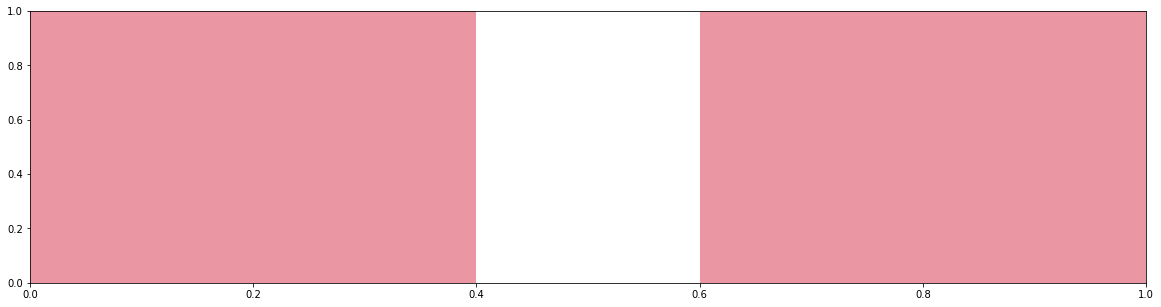

In [129]:
plt.figure(figsize=(20,5))
sns.countplot(x=re후기['레시피_아이디'])
plt.show()

In [130]:
plt.figure(figsize=(20,5))
sns.countplot(x=re후기['유저_아이디'])
plt.show()

KeyboardInterrupt: 

<Figure size 1440x360 with 0 Axes>

In [27]:
test = pd.read_csv('레시피_메타정보_raw.csv')

In [110]:
c4_list

[13654,
 13655,
 13656,
 13657,
 13998,
 14302,
 14862,
 14863,
 15000,
 15001,
 15002,
 15096,
 15155,
 15456,
 15457,
 15931,
 16065,
 16118,
 16119,
 16280,
 16281,
 16528,
 16689,
 18073,
 18147,
 18205,
 18398,
 18400,
 18401,
 18403,
 18404,
 18405,
 18407,
 18408,
 18409,
 18410,
 18411,
 18412,
 18414,
 18415,
 18416,
 18453,
 18456,
 18462,
 18464,
 18467,
 18469,
 18472,
 18475,
 18477,
 18480,
 18482,
 18483,
 18484,
 18489,
 18491,
 19281,
 19718,
 19720,
 19722,
 19723,
 19734,
 19746,
 19747,
 19913,
 19917,
 19919,
 19921,
 19945,
 19949,
 20591,
 20594,
 21022,
 21023,
 21026,
 21029,
 21031,
 21034,
 21262,
 21269,
 21280,
 21361,
 21363,
 21364,
 21374,
 22127,
 22320,
 22732,
 22739,
 22745,
 22748,
 22749,
 22754,
 22758,
 22763,
 22927,
 22930,
 22931,
 22933,
 22934,
 22936,
 22937,
 22939,
 22941,
 23321,
 23335,
 23336,
 23337,
 23339,
 23343,
 23347,
 23356,
 23360,
 23361,
 23362,
 23364,
 24004,
 24005,
 24006,
 24007,
 24009,
 24010,
 24011,
 24013,
 24232,


In [114]:
분류[분류['레시피_아이디'].isin(c4_list)].groupby('레시피_아이디')['분류_코드'].sum().value_counts()

41122863    6284
67173266    5264
6122863     3622
1122854     2576
67173269    1874
            ... 
38142753       1
37192556       1
41123354       1
67462560       1
42182866       1
Name: 분류_코드, Length: 9439, dtype: int64

In [111]:
분류.groupby('레시피_아이디')['분류_코드'].sum().value_counts()

41122863    6284
67173266    5264
6122863     3622
1122854     2576
67173269    1874
            ... 
9222465        1
9187153        1
8215064        1
36207256       1
42182866       1
Name: 분류_코드, Length: 10085, dtype: int64

In [107]:
c4_list = [k for k,v in 분류.groupby('레시피_아이디')['카테고리_코드'].sum().items() if v == 'cat1cat2cat3cat4']

In [108]:
r2_list = [k for k,v in 후기['레시피_아이디'].value_counts().items() if v >= 2]
u2_list = [k for k,v in 후기['유저_아이디'].value_counts().items() if v >= 2]

In [109]:
re재료 = 재료[~재료['재료_아이디'].isna()].reset_index(drop=True)
re후기= 후기[후기['등록일'] != '0000-00-00 00:00:00'].reset_index(drop=True)
re재료 = re재료[re재료['레시피_아이디'].isin(c4_list)].reset_index(drop=True)
re후기 = 후기[(후기['레시피_아이디'].isin(r2_list))&(후기['유저_아이디'].isin(u2_list))&(후기['레시피_아이디'].isin(re재료['레시피_아이디'].tolist()))].reset_index(drop=True)
re후기 = re후기[re후기['등록일'] != '0000-00-00 00:00:00'].reset_index(drop=True)

In [87]:
re재료['재료_아이디'].isna().sum()

0

In [85]:
re재료[re재료['재료_아이디'].isna()]

,레시피_아이디,재료_아이디,재료_이름,레시피_재료_순번,내용


In [120]:
레시피_[레시피_['제목'].isna()]['레시피_아이디']

,레시피_아이디,조회수,레시피_메인이미지,유저_아이디,제목,등록일,수정일,요약,인원수,소요시간,난이도
65792,6861157,835,https://recipe1.ezmember.co.kr/cache/recipe/20...,97416909,NaN,2016-11-18,2016-11-18,cgv에서 영화보면서 간단하게 먹을 수 있는 간식입니다.,3인분,10분 이내,아무나
133663,6934806,36,https://recipe1.ezmember.co.kr/cache/recipe/20...,10120055,NaN,2020-06-23,2020-06-24,NaN,NaN,NaN,NaN
151581,6953561,349,https://recipe1.ezmember.co.kr/cache/recipe/20...,you82940,NaN,2021-02-16,2021-02-16,요즘 유행하는 핫코코아 밤,3인분,60분 이내,초급
163190,6965694,297,https://recipe1.ezmember.co.kr/cache/recipe/20...,isn56,NaN,2021-09-24,2021-09-24,솎음열무김치 담았어요\n텃밭에 가니 쑥쑥 ~~\n솎음해서 김치로 담으니 연해서 먹기...,6인분 이상,120분 이내,초급


In [144]:
분류[:]

,레시피_아이디,카테고리_코드,카테고리_내용,분류_코드,분류_내용
0,13654,cat1,방법별,11,기타
1,13654,cat2,상황별,17,간식
2,13654,cat3,재료별,28,채소류
3,13654,cat4,종류별,59,차/음료/술
4,13655,cat1,방법별,1,끓이기
...,...,...,...,...,...
710154,6979770,cat4,종류별,52,밥/죽/떡
710155,6979771,cat1,방법별,42,비빔
710156,6979771,cat2,상황별,12,일상
710157,6979771,cat3,재료별,33,가공식품류


In [142]:
분류[10500:10550]

,레시피_아이디,카테고리_코드,카테고리_내용,분류_코드,분류_내용
10500,613887,cat4,종류별,63,밑반찬
10501,613935,cat1,방법별,67,굽기
10502,613935,cat2,상황별,17,간식
10503,613935,cat3,재료별,26,곡류
10504,613935,cat4,종류별,69,과자
10505,614801,cat1,방법별,7,부침
10506,614801,cat2,상황별,12,일상
10507,614801,cat3,재료별,28,채소류
10508,614801,cat4,종류별,63,밑반찬
10509,614803,cat1,방법별,41,무침


In [137]:
태그[150:200]

,레시피_아이디,레시피_태그_순번,내용
150,1560967,8,#모발건강
151,1560967,9,#탈모
152,1582543,1,#시금치
153,1582543,2,#단감
154,1582543,3,#엽산
155,1582543,4,#샐러드
156,1582543,5,#임신이잘되는
157,1582543,6,#임신
158,1582543,7,#임신준비
159,1582543,8,#계획임신


In [118]:
print(re후기['레시피_아이디'].nunique())
print(re후기['유저_아이디'].nunique())

29858
53296


In [104]:
r2_list = [k for k,v in 후기['레시피_아이디'].value_counts().items() if v >= 2]
u2_list = [k for k,v in 후기['유저_아이디'].value_counts().items() if v >= 2]

In [ ]:
re재료['레시피_아이디'].tolist()

In [127]:
re후기[re후기['레시피_아이디'].isin(레시피_[레시피_['제목'].isna()]['레시피_아이디'].tolist())]

,레시피_아이디,유저_아이디,레시피_유저_순번,별점,등록일,내용,이미지


In [113]:
re후기.shape

(270289, 7)

In [115]:
re후기[re후기['등록일'] != '0000-00-00 00:00:00']

,레시피_아이디,유저_아이디,레시피_유저_순번,별점,등록일,내용,이미지
33012,6832339,ashford,1,5,0000-00-00 00:00:00,처음인데 식구들이 다 조아하네요 밥솥이 비었어요 벌써. 나중에 소고기 볶은 것을 첨...,https://recipe1.ezmember.co.kr/cache/review/20...
82444,6837886,ashford,4,5,0000-00-00 00:00:00,콩나물 무침 조금만 만들려고 했는데 소금을 너무 마니 넣어 짜져서 할수 없이 또 콩...,https://recipe1.ezmember.co.kr/cache/review/20...


In [150]:
분류

,레시피_아이디,카테고리_코드,카테고리_내용,분류_코드,분류_내용
0,13654,cat1,방법별,11,기타
1,13654,cat2,상황별,17,간식
2,13654,cat3,재료별,28,채소류
3,13654,cat4,종류별,59,차/음료/술
4,13655,cat1,방법별,1,끓이기
...,...,...,...,...,...
710154,6979770,cat4,종류별,52,밥/죽/떡
710155,6979771,cat1,방법별,42,비빔
710156,6979771,cat2,상황별,12,일상
710157,6979771,cat3,재료별,33,가공식품류


In [151]:
분류.groupby('레시피_아이디')['분류_내용'].sum()

레시피_아이디
13654      기타간식채소류차/음료/술
13655         끓이기간식해물류스프
13656        기타간식기타밥/죽/떡
13657       기타간식콩/견과류디저트
13998         끓이기간식채소류스프
               ...      
6979767      끓이기해장해물류국/탕
6979768    굽기영양식돼지고기메인반찬
6979769     기타다이어트과일류샐러드
6979770     볶음일상해물류밥/죽/떡
6979771       비빔일상가공식품류빵
Name: 분류_내용, Length: 178221, dtype: object

In [149]:
분류.groupby('레시피_아이디')['분류_내용'].sum().value_counts()[:50]

무침일상채소류밑반찬         6284
굽기간식밀가루빵           5264
볶음일상채소류밑반찬         3622
끓이기일상채소류국/탕        2576
굽기간식밀가루과자          1874
볶음일상건어물류밑반찬        1813
끓이기일상해물류국/탕        1775
절임일상채소류김치/젓갈/장류    1689
절임일상채소류밑반찬         1597
무침일상채소류김치/젓갈/장류    1526
볶음일상돼지고기메인반찬       1513
조림일상채소류밑반찬         1484
끓이기일상소고기국/탕        1384
끓이기일상채소류찌개         1364
조림일상해물류메인반찬        1252
부침일상채소류밑반찬         1220
볶음일상가공식품류밑반찬       1147
볶음일상쌀밥/죽/떡         1113
볶음일상채소류밥/죽/떡        999
끓이기일상가공식품류면/만두      953
끓이기일상콩/견과류찌개        946
무침초스피드채소류밑반찬        901
부침일상달걀/유제품밑반찬       877
끓이기일상가공식품류국/탕       871
조림일상콩/견과류밑반찬        869
끓이기일상밀가루면/만두        868
볶음일상해물류메인반찬         861
끓이기일상가공식품류찌개        844
볶음일상밀가루면/만두         840
볶음일상가공식품류밥/죽/떡      838
끓이기일상돼지고기찌개         793
끓이기일상채소류밥/죽/떡       793
끓이기일상해물류찌개          764
굽기일상밀가루빵            683
무침일상해물류밑반찬          671
끓이기일상건어물류국/탕        671
굽기간식달걀/유제품빵         608
끓이기일상닭고기국/탕         605
찜일상돼지고기메인반찬         597
볶음일상해물류밥/죽/떡        596
기타간식밀가루빵            592
끓이기영양식닭고기국/탕    

In [82]:
re재료

,레시피_아이디,재료_아이디,재료_이름,레시피_재료_순번,내용
0,1000240,499,소고기 다짐육,1,300그램
1,1000240,440,빵가루,2,50그램
2,1000240,219,노른자,3,1개
3,1000240,2,양파 작은것,4,1/2개
4,1000240,436,사르로소 포도씨유,6,1큰술
...,...,...,...,...,...
1468406,6908398,424,찬밥,4,3인분
1468407,6908398,46,콩나물,5,1/2봉지
1468408,6908398,481,굴소스,6,3큰술
1468409,6908398,666,참기름,7,1큰술


In [81]:
재료_[재료_['재료_아이디'] == 50][:50]

,재료_아이디,재료_이름
7851,50,토마토 중
7852,50,시판 토마토 퓨레
7853,50,사각 썬 토마토 큰것
7854,50,토마토(데코용)
7855,50,여린채소 약간 토마토
7856,50,토마토 작은거
7857,50,토마토 스파게티소스
7858,50,ABCT주스 또는 토마토
7859,50,토마토(400g)
7860,50,껍질 벗겨 다진 토마토


In [75]:
re재료

,레시피_아이디,재료_아이디,재료_이름,레시피_재료_순번,내용
0,1000240,499,소고기 다짐육,1,300그램
1,1000240,440,빵가루,2,50그램
2,1000240,219,노른자,3,1개
3,1000240,2,양파 작은것,4,1/2개
4,1000240,436,사르로소 포도씨유,6,1큰술
...,...,...,...,...,...
1468406,6908398,424,찬밥,4,3인분
1468407,6908398,46,콩나물,5,1/2봉지
1468408,6908398,481,굴소스,6,3큰술
1468409,6908398,666,참기름,7,1큰술


In [72]:
재료[~재료['재료_아이디'].isna()].reset_index(drop=True).shape

(1468411, 5)

In [73]:
re재료[재료['레시피_아이디'].isin(c4_list)].reset_index(drop=True).shape

(1468411, 5)

In [71]:
re재료

,레시피_아이디,재료_아이디,재료_이름,레시피_재료_순번,내용
0,1000240,499,소고기 다짐육,1,300그램
1,1000240,440,빵가루,2,50그램
2,1000240,219,노른자,3,1개
3,1000240,2,양파 작은것,4,1/2개
4,1000240,436,사르로소 포도씨유,6,1큰술
...,...,...,...,...,...
1468406,6908398,424,찬밥,4,3인분
1468407,6908398,46,콩나물,5,1/2봉지
1468408,6908398,481,굴소스,6,3큰술
1468409,6908398,666,참기름,7,1큰술


In [94]:
re재료['재료_아이디']

0          499
1          440
2          219
3            2
4          436
          ... 
1468406    424
1468407     46
1468408    481
1468409    666
1468410    508
Name: 재료_아이디, Length: 1468411, dtype: object

In [ ]:
재료[재료['레실ㅍ_아이디'].isin()]

In [63]:
re재료

,레시피_아이디,재료_아이디,재료_이름,레시피_재료_순번,내용
0,1000240,499,소고기 다짐육,1,300그램
1,1000240,440,빵가루,2,50그램
2,1000240,219,노른자,3,1개
3,1000240,2,양파 작은것,4,1/2개
4,1000240,436,사르로소 포도씨유,6,1큰술
...,...,...,...,...,...
1468406,6908398,424,찬밥,4,3인분
1468407,6908398,46,콩나물,5,1/2봉지
1468408,6908398,481,굴소스,6,3큰술
1468409,6908398,666,참기름,7,1큰술


[13654,
 13655,
 13656,
 13657,
 13998,
 14302,
 14862,
 14863,
 15000,
 15001,
 15002,
 15096,
 15155,
 15456,
 15457,
 15931,
 16065,
 16118,
 16119,
 16280,
 16281,
 16528,
 16689,
 18073,
 18147,
 18205,
 18398,
 18400,
 18401,
 18403,
 18404,
 18405,
 18407,
 18408,
 18409,
 18410,
 18411,
 18412,
 18414,
 18415,
 18416,
 18453,
 18456,
 18462,
 18464,
 18467,
 18469,
 18472,
 18475,
 18477,
 18480,
 18482,
 18483,
 18484,
 18489,
 18491,
 19281,
 19718,
 19720,
 19722,
 19723,
 19734,
 19746,
 19747,
 19913,
 19917,
 19919,
 19921,
 19945,
 19949,
 20591,
 20594,
 21022,
 21023,
 21026,
 21029,
 21031,
 21034,
 21262,
 21269,
 21280,
 21361,
 21363,
 21364,
 21374,
 22127,
 22320,
 22732,
 22739,
 22745,
 22748,
 22749,
 22754,
 22758,
 22763,
 22927,
 22930,
 22931,
 22933,
 22934,
 22936,
 22937,
 22939,
 22941,
 23321,
 23335,
 23336,
 23337,
 23339,
 23343,
 23347,
 23356,
 23360,
 23361,
 23362,
 23364,
 24004,
 24005,
 24006,
 24007,
 24009,
 24010,
 24011,
 24013,
 24232,


In [53]:
re재료

,레시피_아이디,재료_아이디,재료_이름,레시피_재료_순번,내용


In [42]:
태그

,레시피_아이디,레시피_태그_순번,내용
0,1034416,1,#쇠고기
1,1034416,2,#장조림
2,1034416,3,#쇠고기장조림
3,1034416,4,#철분
4,1034416,5,#빈혈
...,...,...,...
746232,6908397,3,#일본식계란말이
746233,6908398,1,#김치볶음밥
746234,6908398,2,#냉파요리
746235,6908398,3,#콩나물김치볶음밥


In [43]:
분류

,레시피_아이디,카테고리_코드,카테고리_내용,분류_코드,분류_내용
0,13654,cat1,방법별,11,기타
1,13654,cat2,상황별,17,간식
2,13654,cat3,재료별,28,채소류
3,13654,cat4,종류별,59,차/음료/술
4,13655,cat1,방법별,1,끓이기
...,...,...,...,...,...
710154,6979770,cat4,종류별,52,밥/죽/떡
710155,6979771,cat1,방법별,42,비빔
710156,6979771,cat2,상황별,12,일상
710157,6979771,cat3,재료별,33,가공식품류


In [ ]:
6978911

In [48]:
분류[분류['레시피_아이디'] == 6974675]

,레시피_아이디,카테고리_코드,카테고리_내용,분류_코드,분류_내용
690715,6974675,cat1,방법별,67,굽기
690716,6974675,cat2,상황별,17,간식
690717,6974675,cat3,재료별,32,밀가루
690718,6974675,cat4,종류별,69,과자


In [51]:
분류.groupby('레시피_아이디')['카테고리_코드'].sum()

레시피_아이디
13654      cat1cat2cat3cat4
13655      cat1cat2cat3cat4
13656      cat1cat2cat3cat4
13657      cat1cat2cat3cat4
13998      cat1cat2cat3cat4
                 ...       
6979767    cat1cat2cat3cat4
6979768    cat1cat2cat3cat4
6979769    cat1cat2cat3cat4
6979770    cat1cat2cat3cat4
6979771    cat1cat2cat3cat4
Name: 카테고리_코드, Length: 178221, dtype: object

In [26]:
레시피_['등록일'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
176454     True
176455    False
176456    False
176457    False
176458    False
Name: 등록일, Length: 176459, dtype: bool

In [28]:
test[test['등록일'].isna()]

,레시피_아이디,조회수,레시피_메인이미지,유저_아이디,제목,등록일,수정일,요약,인원수,소요시간,난이도
81,21023,2801,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools2,[펌] 양파 장아찌,NaN,NaN,NaN,NaN,NaN,NaN
175,25296,4466,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,생태찌개,NaN,NaN,NaN,NaN,NaN,NaN
405,33465,6746,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools2,통닭바베큐,NaN,NaN,NaN,NaN,NaN,NaN
411,33711,5925,https://recipe1.ezmember.co.kr/cache/recipe/20...,baby00,오븐으로 만드는 낙지 호롱,NaN,NaN,NaN,NaN,NaN,NaN
416,33720,2245,https://recipe1.ezmember.co.kr/cache/recipe/20...,baby00,삼색 상투과자,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
176433,6979642,67,https://recipe1.ezmember.co.kr/cache/recipe/20...,92039162,소고기 뭇국,NaN,2022-05-19,집에 무가 농사지일 만큼 있어서 따듯하게 한 번 해봤어요.,4인분,30분 이내,중급
176437,6979646,41,https://recipe1.ezmember.co.kr/cache/recipe/20...,bodornim22,삼겹살 김치찌개 먹다 남은 삼겹살로 만든 간단 요리,NaN,2022-05-19,삼겹살 먹고 남은거 버리지말고 김치찌개 만들어먹자구요!,2인분,30분 이내,아무나
176448,6979658,67,https://recipe1.ezmember.co.kr/cache/recipe/20...,ranch6356,간장 닭봉조림 만들기,NaN,2022-05-19,간단하게 만들어 아이 반찬이 또는\n매콤함 추가해 야식이나 맥주 안주로\n즐기면 맛...,2인분,30분 이내,초급
176453,6979663,34,https://recipe1.ezmember.co.kr/cache/recipe/20...,seel0904,새우케첩볶음 (시아판치에지앙),NaN,2022-05-20,시중에 파는 손질된 흰다리새우를 가지고 중식요리를 만들어 봤어요.\n술안주로 좋은 ...,2인분,60분 이내,초급


In [29]:
후기['등록일'] = pd.to_datetime(후기['등록일'].str.replace('0000-00-00 00:00:00', ''))

NameError: name 'r_u_data' is not defined

In [22]:
후기['등록일']pd.to_datetime(후기['등록일'])

ParserError: year 0 is out of range: 0000-00-00 00:00:00

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(x=후기['등록일'].dt.year)
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

<Figure size 1440x360 with 0 Axes>

In [19]:
후기

,레시피_아이디,유저_아이디,레시피_유저_순번,별점,등록일,내용,이미지
0,100014,77253045,1,5,2017-06-08 19:24:49,레시피대로 따라서 맛있게먹 고있어요~~^^감사합니다,NaN
1,1000637,ina521,1,5,2017-06-11 11:41:00,레시피감사해요잘만들어먹었네요^^,NaN
2,1001360,khea0628,1,5,2017-06-09 12:24:56,너무 맛있게 해먹었습니다. 양도 푸짐하고.. 국물도 끝내주고... 영양만점인듯해요당...,NaN
3,1001902,18187133,1,5,2016-12-23 17:17:45,지금 만드는중인데. 맛있을것 같아요,NaN
4,1002049,80221089,1,3,2017-01-19 07:21:09,오늘 만들어봤는데 간단하고 재료도 많이 필요없어서 노무 좋았어요! 크림이 너무 많았...,NaN
...,...,...,...,...,...,...,...
368524,6908390,10251040,9,5,2020-06-01 12:58:02,간단하고 맛도 좋아요,NaN
368525,6908390,jeungi4860,10,5,2019-07-09 12:16:53,잘만들어먹엇어여~,NaN
368526,6908390,41379274,11,5,2020-09-28 21:28:38,잘 해먹었습니다^^,NaN
368527,6908397,26773485,1,5,2020-01-31 08:27:02,비쥬얼 좋아요 잘먹었습니다,NaN


In [17]:
후기.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368529 entries, 0 to 368528
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   레시피_아이디    368529 non-null  int64 
 1   유저_아이디     368529 non-null  object
 2   레시피_유저_순번  368529 non-null  int64 
 3   별점         368529 non-null  int64 
 4   등록일        368529 non-null  object
 5   내용         368466 non-null  object
 6   이미지        119289 non-null  object
dtypes: int64(3), object(4)
memory usage: 19.7+ MB


In [ ]:
[레시피_,유저_,재료_,재료,순서,태그,후기,분류]

In [13]:
test = ['레시피_','유저_','재료_','재료','순서','태그','후기','분류']

In [15]:
for i,file in enumerate([레시피_,유저_,재료_,재료,순서,태그,후기,분류]):
    for c in file.columns:
        print(test[i],'/',c,'/',file[c].isna().sum())

레시피_ / 레시피_아이디 / 0
레시피_ / 조회수 / 0
레시피_ / 레시피_메인이미지 / 0
레시피_ / 유저_아이디 / 0
레시피_ / 제목 / 4
레시피_ / 등록일 / 5862
레시피_ / 수정일 / 1588
레시피_ / 요약 / 14599
레시피_ / 인원수 / 18468
레시피_ / 소요시간 / 16756
레시피_ / 난이도 / 13267
유저_ / 유저_아이디 / 0
유저_ / 유저_닉네임 / 1301
유저_ / 유저_이미지 / 0
재료_ / 재료_아이디 / 0
재료_ / 재료_이름 / 0
재료 / 레시피_아이디 / 0
재료 / 재료_아이디 / 62827
재료 / 재료_이름 / 0
재료 / 레시피_재료_순번 / 0
재료 / 내용 / 170870
순서 / 레시피_아이디 / 0
순서 / 레시피_순서_순번 / 0
순서 / 내용 / 130
순서 / 이미지 / 28367
태그 / 레시피_아이디 / 0
태그 / 레시피_태그_순번 / 0
태그 / 내용 / 0
후기 / 레시피_아이디 / 0
후기 / 유저_아이디 / 0
후기 / 레시피_유저_순번 / 0
후기 / 별점 / 0
후기 / 등록일 / 0
후기 / 내용 / 63
후기 / 이미지 / 249240
분류 / 레시피_아이디 / 0
분류 / 카테고리_코드 / 0
분류 / 카테고리_내용 / 0
분류 / 분류_코드 / 0
분류 / 분류_내용 / 0


In [4]:
분류['']

,레시피_아이디,카테고리_코드,카테고리_내용,분류_코드,분류_내용
0,13654,cat1,방법별,11,기타
1,13654,cat2,상황별,17,간식
2,13654,cat3,재료별,28,채소류
3,13654,cat4,종류별,59,차/음료/술
4,13655,cat1,방법별,1,끓이기
...,...,...,...,...,...
710154,6979770,cat4,종류별,52,밥/죽/떡
710155,6979771,cat1,방법별,42,비빔
710156,6979771,cat2,상황별,12,일상
710157,6979771,cat3,재료별,33,가공식품류


In [3]:
레시피_

,레시피_아이디,조회수,레시피_메인이미지,유저_아이디,제목,등록일,수정일,요약,인원수,소요시간,난이도
0,13654,4115,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,바나나 고구마 셔벗,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
1,13655,2165,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,생선수프,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
2,13656,1777,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,밤대추 미음,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
3,13657,2011,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,바닐라 견과류 아이스크림,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
4,13998,6107,https://recipe1.ezmember.co.kr/cache/recipe/20...,magicgirl,감자스프,2005-06-15,2005-06-15,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
176454,6979664,47,https://recipe1.ezmember.co.kr/cache/recipe/20...,dudfhr79,훈제오리고기로 만드는 훈제오리주물럭 레시피!,NaT,2022-05-20,훈제오리고기로 만드는 훈제오리주물럭 레시피 입니다.,3인분,30분 이내,초급
176455,6979665,29,https://recipe1.ezmember.co.kr/cache/recipe/20...,jylhee070467,최고의 요리비결 부추전,2022-05-20,2022-05-20,"부추는 비타민의 보고라고 불릴 정도로 비타민 A, B1, B2, C 등이 풍부하고 ...",1인분,30분 이내,아무나
176456,6979666,14,https://recipe1.ezmember.co.kr/cache/recipe/20...,soylee1015,꽃 요리 아카시아꽃 튀김 향긋한 튀김,2022-05-20,2022-05-20,산에서 딴 아카시아 꽃으로 아카시아 꽃 튀김을 \n만들어 봅니다. 모양도 향기도 좋...,2인분,10분 이내,아무나
176457,6979667,49,https://recipe1.ezmember.co.kr/cache/recipe/20...,62929808,시원한 광어물회 맛있게 간단히 만들어 보세요.,2022-05-20,2022-05-20,시원한 광어물회 '이것' 넣어서 간편하고 맛있게 만들어 보세요.,1인분,15분 이내,아무나


In [ ]:
'0000-00-00 00:00:00'

In [95]:
재료[재료['재료_아이디'].isna()]['재료_이름'].value_counts()

떡갈비           113
엿기름           107
시리얼           105
동그랑땡           97
와인             96
             ... 
들깨가구            1
게내장             1
케첩/토마토소스        1
파마산치즈가루/허브      1
백련초 분말          1
Name: 재료_이름, Length: 31946, dtype: int64

In [101]:
재료_[재료_['재료_이름'].isin(['소금'])]

,재료_아이디,재료_이름
32037,501,소금


In [96]:
재료[재료['재료_아이디'].isna()][:50]

,레시피_아이디,재료_아이디,재료_이름,레시피_재료_순번,내용
4,1000240,NaN,기꼬망마리네이트소스,5,NaN
7,1000240,NaN,토스티드세사미 마리네이드소스,8,1+1/2큰술
11,1000318,NaN,두부슬라이스,1,2쪽
24,1000763,NaN,아몬두가루,6,30g
27,1000763,NaN,흰앙금,9,300~400g
96,1002049,NaN,나빠쥬,15,NaN
116,1002380,NaN,채소(양파/대파등),2,적당량
127,1002650,NaN,ⓐ설탕,2,40g
129,1002650,NaN,ⓑ설탕,4,35g
131,1002650,NaN,바닐라설탕or바닐라오일,6,NaN


In [87]:
태크

,레시피_아이디,레시피_태그_순번,내용
0,1034416,1,#쇠고기
1,1034416,2,#장조림
2,1034416,3,#쇠고기장조림
3,1034416,4,#철분
4,1034416,5,#빈혈
...,...,...,...
746232,6908397,3,#일본식계란말이
746233,6908398,1,#김치볶음밥
746234,6908398,2,#냉파요리
746235,6908398,3,#콩나물김치볶음밥


In [86]:
태크

,레시피_아이디,레시피_태그_순번,내용
0,1034416,1,#쇠고기
1,1034416,2,#장조림
2,1034416,3,#쇠고기장조림
3,1034416,4,#철분
4,1034416,5,#빈혈
...,...,...,...
746232,6908397,3,#일본식계란말이
746233,6908398,1,#김치볶음밥
746234,6908398,2,#냉파요리
746235,6908398,3,#콩나물김치볶음밥


In [90]:
태크[태크['레시피_아이디'] == 6979771]

,레시피_아이디,레시피_태그_순번,내용


In [82]:
분류

,레시피_아이디,카테고리_코드,카테고리_내용,분류_코드,분류_내용
0,13654,cat1,방법별,11,기타
1,13654,cat2,상황별,17,간식
2,13654,cat3,재료별,28,채소류
3,13654,cat4,종류별,59,차/음료/술
4,13655,cat1,방법별,1,끓이기
...,...,...,...,...,...
710154,6979770,cat4,종류별,52,밥/죽/떡
710155,6979771,cat1,방법별,42,비빔
710156,6979771,cat2,상황별,12,일상
710157,6979771,cat3,재료별,33,가공식품류


In [68]:
후기['별점'].value_counts()

5    333047
4     28113
3      6021
2       746
1       602
Name: 별점, dtype: int64

In [80]:
분류

,레시피_아이디,카테고리_코드,카테고리_내용,분류_코드,분류_내용
0,13654,cat1,방법별,11,기타
1,13654,cat2,상황별,17,간식
2,13654,cat3,재료별,28,채소류
3,13654,cat4,종류별,59,차/음료/술
4,13655,cat1,방법별,1,끓이기
...,...,...,...,...,...
710154,6979770,cat4,종류별,52,밥/죽/떡
710155,6979771,cat1,방법별,42,비빔
710156,6979771,cat2,상황별,12,일상
710157,6979771,cat3,재료별,33,가공식품류


In [81]:
분류['레시피_아이디'].groupby['카테고리_코드']

TypeError: 'method' object is not subscriptable

In [76]:
분류['레시피_아이디'].groupby(['카테고리_코드'].sum)

AttributeError: 'list' object has no attribute 'sum'

In [71]:
후기[후기['등록일'] == '0000-00-00 00:00:00']

,레시피_아이디,유저_아이디,레시피_유저_순번,별점,등록일,내용,이미지
48595,6832339,ashford,1,5,0000-00-00 00:00:00,처음인데 식구들이 다 조아하네요 밥솥이 비었어요 벌써. 나중에 소고기 볶은 것을 첨...,https://recipe1.ezmember.co.kr/cache/review/20...
121185,6837886,ashford,4,5,0000-00-00 00:00:00,콩나물 무침 조금만 만들려고 했는데 소금을 너무 마니 넣어 짜져서 할수 없이 또 콩...,https://recipe1.ezmember.co.kr/cache/review/20...


In [69]:
후기

,레시피_아이디,유저_아이디,레시피_유저_순번,별점,등록일,내용,이미지
0,100014,77253045,1,5,2017-06-08 19:24:49,레시피대로 따라서 맛있게먹 고있어요~~^^감사합니다,NaN
1,1000637,ina521,1,5,2017-06-11 11:41:00,레시피감사해요잘만들어먹었네요^^,NaN
2,1001360,khea0628,1,5,2017-06-09 12:24:56,너무 맛있게 해먹었습니다. 양도 푸짐하고.. 국물도 끝내주고... 영양만점인듯해요당...,NaN
3,1001902,18187133,1,5,2016-12-23 17:17:45,지금 만드는중인데. 맛있을것 같아요,NaN
4,1002049,80221089,1,3,2017-01-19 07:21:09,오늘 만들어봤는데 간단하고 재료도 많이 필요없어서 노무 좋았어요! 크림이 너무 많았...,NaN
...,...,...,...,...,...,...,...
368524,6908390,10251040,9,5,2020-06-01 12:58:02,간단하고 맛도 좋아요,NaN
368525,6908390,jeungi4860,10,5,2019-07-09 12:16:53,잘만들어먹엇어여~,NaN
368526,6908390,41379274,11,5,2020-09-28 21:28:38,잘 해먹었습니다^^,NaN
368527,6908397,26773485,1,5,2020-01-31 08:27:02,비쥬얼 좋아요 잘먹었습니다,NaN


In [66]:
태크[:50]

,레시피_아이디,레시피_태그_순번,내용
0,1034416,1,#쇠고기
1,1034416,2,#장조림
2,1034416,3,#쇠고기장조림
3,1034416,4,#철분
4,1034416,5,#빈혈
5,1034416,6,#산후다이어트
6,1034416,7,#산모에게 좋은 음식
7,1034416,8,#다이어트
8,1038119,1,#월남쌈
9,1038119,2,#돈가스


In [38]:
레시피_['인원수']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
176454    3인분
176455    1인분
176456    2인분
176457    1인분
176458    2인분
Name: 인원수, Length: 176459, dtype: object

In [44]:
레시피_['레시피_메인이미지'][0]

'https://recipe1.ezmember.co.kr/cache/recipe/2015/06/05/651a9ec90e91e71450f5cf4cbdcb8272.jpg'

In [ ]:
재료_ []

In [52]:
재료_[재료_['재료_아이디'] == 31]['재료_이름'].tolist()

['배추(or 양배추)',
 '배추 면기에',
 '속 배추잎',
 '절인 배추잎',
 '쌈용 배추',
 '절임 배추(20kg)',
 '배추(대)',
 '배추(대충)',
 '텃밭 배추',
 '단배추',
 '알배기 배추 중간크기',
 '배추 또는 양배추',
 '배추(중간크기)',
 '쌈용 배추(소)',
 '알배기 배추잎',
 '곰보 배추',
 '익은 배추 김치',
 '배추 큰것',
 '배추 15잎',
 '배추 또는 봄동',
 '여린 배추',
 '배추 1망',
 '배추 속노란부분',
 '배추 묵은지 작은',
 '배추 (김치',
 '단 배추',
 '삶은 배추 또는 우거지',
 '얼가리 배추 속대',
 '배추 속잎 작은 것',
 '배추(노란안쪽만사용)',
 '배추 작은 거',
 '배추잎 소',
 '배춧잎 초록부분',
 '배추(중)',
 '배추 알배추 작은거',
 '배추 우거지(데친 것) 크게',
 '절인 배추',
 '중간크기 배추',
 '속배추',
 '노란 배추 대',
 '포기김치용 배추잎',
 '얼갈이 배추 우거지',
 '절임배추',
 '알배기 배추 겉잎',
 '작은 포기 배추',
 '배추 노란 잎',
 '배추잎(큰거)',
 '배춧잎 큰잎으로',
 '배추 작은 것',
 '배추 절이기',
 '단배추 삶은것',
 '절임 배추',
 '채 썬 배추',
 '알 배추',
 '배추 절일 물',
 '데친단 배추',
 '배추 우거지(시래기)',
 '배춧잎(어른 손바닥 크기)',
 '알배기 배추 작은것',
 '배추 외',
 '쌈 배추',
 '절임배추 대체 생배추',
 '배추(소)',
 '배추잎',
 '얼갈이 배추 속대 (1단 속 작은잎만)',
 '배추 작은배추',
 '김장용 배추',
 '배추 속잎',
 '배추',
 '▶재료 : 삶은 배추',
 '배추 포기당',
 '해남 배추',
 '배추 알배기',
 '배추(신김치)',
 '배추(삶은 것)',
 '배추(절임)',
 '알 배춧잎',
 '채 썬 배추 속',
 '데친 얼갈이 배추',
 '배추 절일 천일염',
 '배추 한 포기',
 '배추 or

In [60]:
순서['이미지'].value_counts()[:50]

https://recipe1.ezmember.co.kr/cache/recipe/2016/08/24/0bb886c4603c7122024dd581fb8ea95a.jpg     8
https://recipe1.ezmember.co.kr/cache/recipe/2016/08/30/e46c96ce3bc19069c1f8e192c9d43858.jpg     6
https://recipe1.ezmember.co.kr/cache/recipe/2016/08/30/9bc87d2c6dd4f14962a372d5199776e5.jpg     5
https://recipe1.ezmember.co.kr/cache/recipe/2016/08/30/de64fb744d9db64cc753f448ec83f947.jpg     5
https://recipe1.ezmember.co.kr/cache/recipe/2016/08/30/58291028e4547eb3325bbc0e7afe5071.jpg     5
https://recipe1.ezmember.co.kr/cache/recipe/2016/08/30/e0c44fb8008ccd6a5e914f51e91e3190.jpg     4
https://recipe1.ezmember.co.kr/cache/recipe/2016/08/24/45814d939de88c23f6ac72199254e7b9.jpg     4
https://recipe1.ezmember.co.kr/cache/recipe/2016/08/30/10cc16b9049d1fed929185158b41d1c9.jpg     4
https://recipe1.ezmember.co.kr/cache/recipe/2016/08/30/9ea6b564f1263c99b39207b881ecaa40.jpg     4
https://recipe1.ezmember.co.kr/cache/recipe/2016/08/30/529c3070dec882dd58adfede487d1f06.jpg     3
https://recipe1.ezme

In [ ]:
순서[]

In [63]:
순서[1000:1050]

,레시피_아이디,레시피_순서_순번,내용,이미지
1000,1032173,7,따뜻한 국수를 그릇에 담고 볶아놓은 자장소스를 국수 위에 붓고 오이채를 올리면 완성...,https://recipe1.ezmember.co.kr/cache/recipe/20...
1001,1032620,1,먼저 돼지목살 1근이에요. 먹기좋은 두께로 두툼하게 썰고,https://recipe1.ezmember.co.kr/cache/recipe/20...
1002,1032620,2,한번 더 잘라 먹기좋은 크기로 만들고,https://recipe1.ezmember.co.kr/cache/recipe/20...
1003,1032620,3,"연육재료 - 키위(1/2개), 양파(1/2개), 마늘(4개), 청양고추(2개), 파...",https://recipe1.ezmember.co.kr/cache/recipe/20...
1004,1032620,4,돼지고기에 부어 양념을 고루 묻혀 냉장고에서 1시간이상 숙성시키고 손님이 찾아올때나...,https://recipe1.ezmember.co.kr/cache/recipe/20...
1005,1032620,5,오븐팬에 돼지목살을 가지런히 올리고오븐,https://recipe1.ezmember.co.kr/cache/recipe/20...
1006,1032620,6,"꺄 드디어 완성. 대파채와 양파채 편으로 썬 마늘, 어슷썬 청양고추와 함께 내어 드...",https://recipe1.ezmember.co.kr/cache/recipe/20...
1007,1032624,1,먼저 일반두부를 준비하셔서용. 키친타올로 물기를 없애서 준비해요.,https://recipe1.ezmember.co.kr/cache/recipe/20...
1008,1032624,2,"그리고 믹서기에 두부와 우유, 꿀을 넣고 곱게 갈아주세용.",https://recipe1.ezmember.co.kr/cache/recipe/20...
1009,1032624,3,이정도로 두부 알맹이가 없이 곱게 갈아주세용. 곱게 갈지 않았을경우엔 아이스크림을 ...,https://recipe1.ezmember.co.kr/cache/recipe/20...


In [ ]:
순서['이미지']

In [48]:
재료_

,재료_아이디,재료_이름
0,1,시금치 부추(5-6줄기 또는)
1,1,시금치(포항초/노지시금치)
2,1,시금치(무쳐놓은거)
3,1,시금치 3분의
4,1,시금치 or 도라지등(다양한 나물)
...,...,...
47448,1050,핫도그번
47449,1050,비건핫도그빵
47450,1050,핫도그용빵
47451,1050,핫도그번 (상온)


In [47]:
재료_[:50]

,재료_아이디,재료_이름
0,1,시금치 부추(5-6줄기 또는)
1,1,시금치(포항초/노지시금치)
2,1,시금치(무쳐놓은거)
3,1,시금치 3분의
4,1,시금치 or 도라지등(다양한 나물)
5,1,데친 시금치
6,1,샐러드 시금치
7,1,시금치(or청경채)
8,1,어린잎 시금치
9,1,시금치 한


In [46]:
재료_

,재료_아이디,재료_이름
0,1,시금치 부추(5-6줄기 또는)
1,1,시금치(포항초/노지시금치)
2,1,시금치(무쳐놓은거)
3,1,시금치 3분의
4,1,시금치 or 도라지등(다양한 나물)
...,...,...
47448,1050,핫도그번
47449,1050,비건핫도그빵
47450,1050,핫도그용빵
47451,1050,핫도그번 (상온)


In [43]:
레시피_

,레시피_아이디,조회수,레시피_메인이미지,유저_아이디,제목,등록일,수정일,요약,인원수,소요시간,난이도
0,13654,4115,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,바나나 고구마 셔벗,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
1,13655,2165,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,생선수프,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
2,13656,1777,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,밤대추 미음,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
3,13657,2011,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,바닐라 견과류 아이스크림,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
4,13998,6107,https://recipe1.ezmember.co.kr/cache/recipe/20...,magicgirl,감자스프,2005-06-15,2005-06-15,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
176454,6979664,47,https://recipe1.ezmember.co.kr/cache/recipe/20...,dudfhr79,훈제오리고기로 만드는 훈제오리주물럭 레시피!,NaT,2022-05-20,훈제오리고기로 만드는 훈제오리주물럭 레시피 입니다.,3인분,30분 이내,초급
176455,6979665,29,https://recipe1.ezmember.co.kr/cache/recipe/20...,jylhee070467,최고의 요리비결 부추전,2022-05-20,2022-05-20,"부추는 비타민의 보고라고 불릴 정도로 비타민 A, B1, B2, C 등이 풍부하고 ...",1인분,30분 이내,아무나
176456,6979666,14,https://recipe1.ezmember.co.kr/cache/recipe/20...,soylee1015,꽃 요리 아카시아꽃 튀김 향긋한 튀김,2022-05-20,2022-05-20,산에서 딴 아카시아 꽃으로 아카시아 꽃 튀김을 \n만들어 봅니다. 모양도 향기도 좋...,2인분,10분 이내,아무나
176457,6979667,49,https://recipe1.ezmember.co.kr/cache/recipe/20...,62929808,시원한 광어물회 맛있게 간단히 만들어 보세요.,2022-05-20,2022-05-20,시원한 광어물회 '이것' 넣어서 간편하고 맛있게 만들어 보세요.,1인분,15분 이내,아무나


In [42]:
레시피_.iloc[:1,:]

,레시피_아이디,조회수,레시피_메인이미지,유저_아이디,제목,등록일,수정일,요약,인원수,소요시간,난이도
0,13654,4115,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,바나나 고구마 셔벗,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN


In [36]:
pd.merge(레시피_,태크)[]

,레시피_아이디,조회수,레시피_메인이미지,유저_아이디,제목,등록일,수정일,요약,인원수,소요시간,난이도,레시피_태그_순번,내용
0,16528,1247,https://recipe1.ezmember.co.kr/cache/recipe/20...,kid00,밤야채된죽,2005-07-20,2005-07-20,NaN,NaN,NaN,NaN,1,#밤
1,16528,1247,https://recipe1.ezmember.co.kr/cache/recipe/20...,kid00,밤야채된죽,2005-07-20,2005-07-20,NaN,NaN,NaN,NaN,2,#야채
2,16528,1247,https://recipe1.ezmember.co.kr/cache/recipe/20...,kid00,밤야채된죽,2005-07-20,2005-07-20,NaN,NaN,NaN,NaN,3,#죽
3,16528,1247,https://recipe1.ezmember.co.kr/cache/recipe/20...,kid00,밤야채된죽,2005-07-20,2005-07-20,NaN,NaN,NaN,NaN,4,#밤야채된죽
4,16528,1247,https://recipe1.ezmember.co.kr/cache/recipe/20...,kid00,밤야채된죽,2005-07-20,2005-07-20,NaN,NaN,NaN,NaN,5,#완두콩
...,...,...,...,...,...,...,...,...,...,...,...,...,...
746232,6979667,49,https://recipe1.ezmember.co.kr/cache/recipe/20...,62929808,시원한 광어물회 맛있게 간단히 만들어 보세요.,2022-05-20,2022-05-20,시원한 광어물회 '이것' 넣어서 간편하고 맛있게 만들어 보세요.,1인분,15분 이내,아무나,6,#물회레시피
746233,6979667,49,https://recipe1.ezmember.co.kr/cache/recipe/20...,62929808,시원한 광어물회 맛있게 간단히 만들어 보세요.,2022-05-20,2022-05-20,시원한 광어물회 '이것' 넣어서 간편하고 맛있게 만들어 보세요.,1인분,15분 이내,아무나,7,#물회육수
746234,6979667,49,https://recipe1.ezmember.co.kr/cache/recipe/20...,62929808,시원한 광어물회 맛있게 간단히 만들어 보세요.,2022-05-20,2022-05-20,시원한 광어물회 '이것' 넣어서 간편하고 맛있게 만들어 보세요.,1인분,15분 이내,아무나,8,#광어요리
746235,6979667,49,https://recipe1.ezmember.co.kr/cache/recipe/20...,62929808,시원한 광어물회 맛있게 간단히 만들어 보세요.,2022-05-20,2022-05-20,시원한 광어물회 '이것' 넣어서 간편하고 맛있게 만들어 보세요.,1인분,15분 이내,아무나,9,#광어요리맛있게만드는법


In [26]:
태그[:50]

,레시피_아이디,레시피_태그_순번,내용
0,1034416,1,#쇠고기
1,1034416,2,#장조림
2,1034416,3,#쇠고기장조림
3,1034416,4,#철분
4,1034416,5,#빈혈
5,1034416,6,#산후다이어트
6,1034416,7,#산모에게 좋은 음식
7,1034416,8,#다이어트
8,1038119,1,#월남쌈
9,1038119,2,#돈가스


In [27]:
태크[태크['내용'] == '##대구채#간단한반찬#스피드요리#마른반찬#밑반찬#도시락반찬#아이들반찬#어른이반찬#깻잎언니주방']

,레시피_아이디,레시피_태그_순번,내용
39333,6913742,1,##대구채#간단한반찬#스피드요리#마른반찬#밑반찬#도시락반찬#아이들반찬#어른이반찬#깻...


In [32]:
태크['내용'].value_counts()[:50]

#초간단      12333
#밑반찬       8899
#간식        8051
#술안주       5703
#다이어트      4481
#반찬        4033
#한그릇요리     2657
#간단요리      2505
#돼지고기      2378
#집밥        2334
#간단        2276
#야식        2189
#밥반찬       2162
#도시락       1994
#아이간식      1990
#디저트       1945
#초스피드      1806
#밥도둑       1783
#김치        1743
#브런치       1740
#저녁메뉴      1721
#계란        1660
#볶음밥       1639
#감자        1628
#샐러드       1619
#홈베이킹      1595
#국물요리      1588
#건강식       1567
#쉬운반찬      1539
#레시피       1535
#혼밥        1495
#아이들반찬     1488
#자취요리      1483
#아이반찬      1477
#안주        1450
#소고기       1448
#두부        1423
#아이들간식     1318
#맥주안주      1316
#영양식       1300
#샌드위치      1244
#일상        1225
#감자요리      1225
#초간단요리     1174
#국         1166
#손님접대      1131
#쉬운요리      1126
#덮밥        1124
#찌개        1115
#달걀        1107
Name: 내용, dtype: int64

In [29]:
for i in 태크['내용']:
    if len(i) > 3 and i[2] == '#':
        print(i)

# #호흡기보호
# #홍도라지
# #도라지
# #도라지청
# #오쿠도라지청
# #도라지청추천
# #남양유업
#죽#전복죽#전복야채죽#전복#죽요리#원기회복#영양식#보양식
#닭#닭요리#닭볶음탕#카레닭볶음탕#카레요리#말복요리#몸보신#저녁메뉴
#죽#야채죽#크래미죽#크래미야채죽#간편죽#죽레시피#간단죽#한그릇요리#찬밥활용#자투리채소
#죽#죽끓이기#표고버섯#새우#표고버섯죽#새우죽#야채죽#찬밥활용#밥죽#건강식#간편죽
#닭#닭볶음탕#닭도리탕#저녁메뉴#닭요리
#전#호박전
# #홈메이드
# #레시피
# #콩불레시피
# #양념장만들기
# #한끼식사
# #메인반찬
# #메인요리
# #간단레시피
# #치킨리조또
# #한그릇요리
# #쌀요리
# #리소또
# #리소토
# #이탈리아
# #이탈리아요리
# #이탈리아볶음밥
# #영국요리
# #영국음식
# #길거리음식
# #메추리알
# #함박스테이크
# #햄버거스테이크
# #미트볼
# #튀김요리
# #어묵국수
# #오뎅
# #오뎅탕
# #오뎅국수
# #포차오뎅
# #꼬치오뎅
# #오뎅꼬치
# #어묵꼬치
# #배추전황금레시피
# #배추천재료
# #배추전레시피
# #남은배추활용법
# #남은배추처리하기
# #배추요리
# #간단한간식
# #배추전하는방법
#<#우리농산물이유식>
#빵#간식#식빵#디저트


In [22]:
분류

,레시피_아이디,카테고리_코드,카테고리_내용,분류_코드,분류_내용
0,13654,cat1,방법별,11,기타
1,13654,cat2,상황별,17,간식
2,13654,cat3,재료별,28,채소류
3,13654,cat4,종류별,59,차/음료/술
4,13655,cat1,방법별,1,끓이기
...,...,...,...,...,...
710154,6979770,cat4,종류별,52,밥/죽/떡
710155,6979771,cat1,방법별,42,비빔
710156,6979771,cat2,상황별,12,일상
710157,6979771,cat3,재료별,33,가공식품류


In [20]:
레시피_.shape

(176459, 11)

In [21]:
유저_.shape

(136304, 3)

In [17]:
후기

,레시피_아이디,유저_아이디,레시피_유저_순번,별점,등록일,내용,이미지
0,100014,77253045,1,5,2017-06-08 19:24:49,레시피대로 따라서 맛있게먹 고있어요~~^^감사합니다,NaN
1,1000637,ina521,1,5,2017-06-11 11:41:00,레시피감사해요잘만들어먹었네요^^,NaN
2,1001360,khea0628,1,5,2017-06-09 12:24:56,너무 맛있게 해먹었습니다. 양도 푸짐하고.. 국물도 끝내주고... 영양만점인듯해요당...,NaN
3,1001902,18187133,1,5,2016-12-23 17:17:45,지금 만드는중인데. 맛있을것 같아요,NaN
4,1002049,80221089,1,3,2017-01-19 07:21:09,오늘 만들어봤는데 간단하고 재료도 많이 필요없어서 노무 좋았어요! 크림이 너무 많았...,NaN
...,...,...,...,...,...,...,...
368524,6908390,10251040,9,5,2020-06-01 12:58:02,간단하고 맛도 좋아요,NaN
368525,6908390,jeungi4860,10,5,2019-07-09 12:16:53,잘만들어먹엇어여~,NaN
368526,6908390,41379274,11,5,2020-09-28 21:28:38,잘 해먹었습니다^^,NaN
368527,6908397,26773485,1,5,2020-01-31 08:27:02,비쥬얼 좋아요 잘먹었습니다,NaN


In [15]:
레시피_['소요시간'].value_counts()

30분 이내     60102
15분 이내     29166
60분 이내     26872
10분 이내     15670
20분 이내      8509
2시간 이상      5960
5분 이내       5777
90분 이내      5066
120분 이내     2573
888분 이내        8
Name: 소요시간, dtype: int64

In [16]:
레시피_[레시피_['소요시간'] == '888분 이내']

,레시피_아이디,조회수,레시피_메인이미지,유저_아이디,제목,등록일,수정일,요약,인원수,소요시간,난이도
54502,6848585,1621,https://recipe1.ezmember.co.kr/cache/recipe/20...,cjcheiljedang,딸기 바바루아 케이크,2012-01-10,2018-08-06,"젤라틴, 생크림, 과일 퓨레가 들어가는 무스 형태의 바바루아(바바리안 크림). 딸기...",4인분,888분 이내,고급
55403,6849487,1149,https://recipe1.ezmember.co.kr/cache/recipe/20...,cjcheiljedang,마늘바게트,2015-07-23,2018-08-06,마늘바게트로 유명한 맛집에 가면 항상 갓 구워 따끈따끈한 상태의 바게트를 판매한다....,2인분,888분 이내,고급
55407,6849491,479,https://recipe1.ezmember.co.kr/cache/recipe/20...,cjcheiljedang,슈퍼그레인식빵,2015-07-23,2018-08-06,요즘에는 건강빵에 대한 관심이 높다. 보다 건강한 간식 타임을 위해 곡물빵도 직접 ...,2인분,888분 이내,고급
55410,6849494,353,https://recipe1.ezmember.co.kr/cache/recipe/20...,cjcheiljedang,찹쌀꿀모닝,2015-07-23,2018-08-06,식빵믹스로 잉글리쉬머핀을 간편하게 구워 맥모닝 스타일의 햄치즈 샌드위치를 만들어 보...,2인분,888분 이내,고급
55439,6849523,628,https://recipe1.ezmember.co.kr/cache/recipe/20...,cjcheiljedang,포카치아 스테이크 샌드위치,2015-08-19,2018-08-06,NaN,2인분,888분 이내,중급
55463,6849547,1615,https://recipe1.ezmember.co.kr/cache/recipe/20...,cjcheiljedang,블루베리잼 아몬드파이,2015-09-25,2018-08-06,맛과 영양 면에서 완전 안심되는 수제 블루베리 잼은 그냥 먹어도 좋지만 파이 속으로...,2인분,888분 이내,고급
55564,6849648,1310,https://recipe1.ezmember.co.kr/cache/recipe/20...,cjcheiljedang,키위아이스크림,2016-05-04,2018-08-06,요거트에 골드키위를 넣고 믹서에 부드럽게 간 후 얼려 아이스크림을 만들어도 훌륭하겠...,2인분,888분 이내,중급
73766,6869929,773,https://recipe1.ezmember.co.kr/cache/recipe/20...,cjcheiljedang,토마토 요거트 빙수,2017-04-26,2018-08-06,토마토로 만든 빙수는 과연 어떤 맛일까? 무한한 상상과 기대를 불러일으키기 충분하다...,2인분,888분 이내,중급


In [13]:
레시피_

,레시피_아이디,조회수,레시피_메인이미지,유저_아이디,제목,등록일,수정일,요약,인원수,소요시간,난이도
0,13654,4115,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,바나나 고구마 셔벗,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
1,13655,2165,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,생선수프,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
2,13656,1777,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,밤대추 미음,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
3,13657,2011,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,바닐라 견과류 아이스크림,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
4,13998,6107,https://recipe1.ezmember.co.kr/cache/recipe/20...,magicgirl,감자스프,2005-06-15,2005-06-15,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
176454,6979664,47,https://recipe1.ezmember.co.kr/cache/recipe/20...,dudfhr79,훈제오리고기로 만드는 훈제오리주물럭 레시피!,NaT,2022-05-20,훈제오리고기로 만드는 훈제오리주물럭 레시피 입니다.,3인분,30분 이내,초급
176455,6979665,29,https://recipe1.ezmember.co.kr/cache/recipe/20...,jylhee070467,최고의 요리비결 부추전,2022-05-20,2022-05-20,"부추는 비타민의 보고라고 불릴 정도로 비타민 A, B1, B2, C 등이 풍부하고 ...",1인분,30분 이내,아무나
176456,6979666,14,https://recipe1.ezmember.co.kr/cache/recipe/20...,soylee1015,꽃 요리 아카시아꽃 튀김 향긋한 튀김,2022-05-20,2022-05-20,산에서 딴 아카시아 꽃으로 아카시아 꽃 튀김을 \n만들어 봅니다. 모양도 향기도 좋...,2인분,10분 이내,아무나
176457,6979667,49,https://recipe1.ezmember.co.kr/cache/recipe/20...,62929808,시원한 광어물회 맛있게 간단히 만들어 보세요.,2022-05-20,2022-05-20,시원한 광어물회 '이것' 넣어서 간편하고 맛있게 만들어 보세요.,1인분,15분 이내,아무나


In [5]:
재료['재료_아이디'].value_counts()

501    59055
2      55098
226    53857
233    51582
26     50441
       ...  
212        1
222        1
505        1
229        1
956        1
Name: 재료_아이디, Length: 906, dtype: int64

In [12]:
list(재료[재료['재료_아이디'] == '501']['내용'].unique())

['약간',
 nan,
 '1/2작은술',
 '조금',
 '4g',
 '5g',
 '1작은술',
 '1/4작은술',
 '1과1/2작은술',
 '1큰술',
 '1/2Ts',
 '1/2ts',
 '1/5티스푼',
 '0.2작은술',
 '0.5작은술',
 '150g',
 '1/2큰술',
 '1~2큰술',
 '0.3큰술',
 '1+1/2t',
 '0.3작은술',
 '1/4ts',
 '0.5T',
 '3g',
 '2g',
 '0.3T',
 '소량',
 '1g',
 '0.5스푼',
 '0.2숟갈',
 '1/3ts',
 '0.5ts',
 '0.2ts',
 '1꼬집',
 '0.5큰술',
 '2그램',
 '1ts',
 '1/3큰술',
 '적당량',
 '1.5작은술',
 '1/5스푼',
 '1티스푼 후추 약간',
 '1줌',
 '2작은술',
 '6~7숟가락',
 '1차스푼',
 '3~4큰술',
 '1/2티스푼',
 '3그람',
 '0.5',
 '0.3스푼',
 '8g',
 '2큰술',
 '한꼬집',
 '1Ts',
 '나머지간',
 '1|1/2큰술',
 '1+1/5작은술',
 '6꼬집',
 '아주조금',
 '1티스푼',
 '1숟가락',
 '1+1/2작은술',
 '1/4t',
 '1/3수저',
 '1~2작은술',
 '9g',
 '1/2t',
 '5그램',
 '5개',
 '90ml',
 '7g',
 '2꼬집',
 '1/3작은술',
 '2~3g',
 '1T',
 '0.7큰술',
 '0.4큰술',
 '0.9큰술',
 '6g',
 '1/6ts',
 '1.5ts',
 '1/4T',
 '1+1/2티스푼',
 '조금씩',
 '2.5g',
 '1/2스푼',
 '1+1/2큰술',
 '2/3스푼',
 '10g',
 '1/2T',
 '2T',
 '1.5g',
 '1/2티스픈',
 '아주약간',
 '1t',
 '2티스푼',
 '1그램',
 '1스푼',
 '1/8작은술',
 '1찻술',
 '1/4Ts',
 '2+1/2큰술',
 '0.8수저',
 '1/2큰술.',
 '1수저',
 '2ts',
 '7~8g'

In [142]:
for i in r_s_data.columns:
    print(i,r_s_data[i].nunique())

레시피_아이디 161908
레시피_순서_순번 64
내용 1231963
이미지 1249008


In [140]:
r_i_data['레시피_아이디'].nun

,레시피_아이디,재료_아이디,재료_이름,레시피_재료_순번,내용
0,1000240,499,소고기 다짐육,1,300그램
1,1000240,440,빵가루,2,50그램
2,1000240,219,노른자,3,1개
3,1000240,2,양파 작은것,4,1/2개
4,1000240,NaN,기꼬망마리네이트소스,5,NaN
...,...,...,...,...,...
1531233,6908398,424,찬밥,4,3인분
1531234,6908398,46,콩나물,5,1/2봉지
1531235,6908398,481,굴소스,6,3큰술
1531236,6908398,666,참기름,7,1큰술


In [139]:
r_u_data[r_u_data['별점'] == 1]

,레시피_아이디,유저_아이디,레시피_유저_순번,별점,등록일,내용,이미지
604,1234352,40029636,46,1,2016-10-28 22:33:11,아니에요,NaN
898,1385506,82826559,1,1,2016-10-21 14:02:14,몇그램씩하는지 전혀업네요ㅡㅡ,NaN
915,1394155,10613236,2,1,2016-04-30 20:29:15,억..맛이 이상해여ㅠㅠ일반 식용류써서 그른가ㅠㅠ,NaN
1753,1607382,97937906,15,1,2020-09-25 22:31:58,폭망.... 했어요...\n설명이 너무 적어요 ㅠㅠ 저같은 베이킹 초보에게.... ㅠ,https://recipe1.ezmember.co.kr/cache/review/20...
3565,1785098,20198667,855,1,2019-07-13 20:11:25,최악입니다 고추장 넣어서 쓴맛나요 차라리 고추가루 넣으세요 님들. 요리 실패햇음,NaN
...,...,...,...,...,...,...,...
364687,6906911,best9088,4,1,2019-08-15 10:55:42,김5장 \n분명 물한컵 (쪼주잔이라 명시를 하시지ㅜㅜ)\n김국이 되네요~\n양념이 ...,NaN
365624,6907350,33574580,1,1,2021-05-11 11:35:31,이렇게 하니 껍질이랑 속살이랑 전혀 분리가 안되더라구요. 더 구우면 될까 싶어서 더...,NaN
367546,6907878,16837199,42,1,2019-03-31 20:22:58,덕분에 새로운 음식하나 했네요^^\n맛있어요~~,https://recipe1.ezmember.co.kr/cache/review/20...
367881,6908024,69394975,1,1,2019-03-15 19:11:19,레시피잘봐습니다•,NaN


In [92]:
r_u_data['등록일'] = pd.to_datetime(r_u_data['등록일'].str.replace('0000-00-00 00:00:00', ''))

In [96]:
plt.figure(figsize=(15,5))
sns.countplot(x=r_u_data['등록일'])
plt.show()

KeyboardInterrupt: 

<Figure size 1080x360 with 0 Axes>

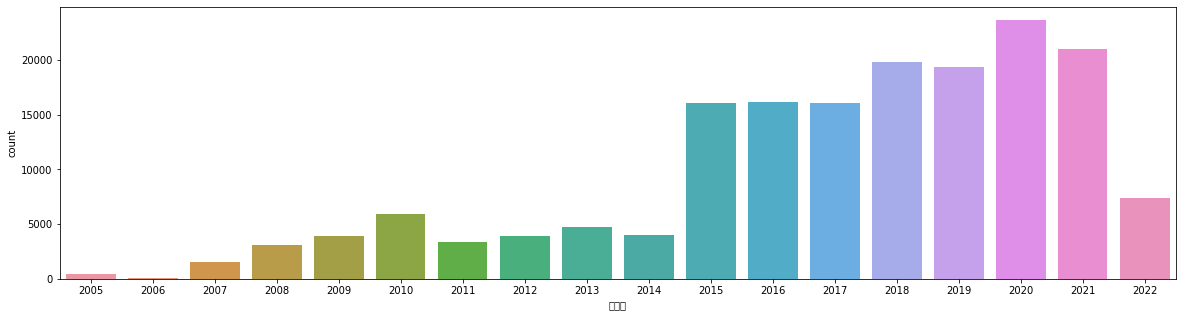

In [118]:
plt.figure(figsize=(20,5))
sns.countplot(x=r_meta['등록일'].dropna().dt.year)
plt.show()

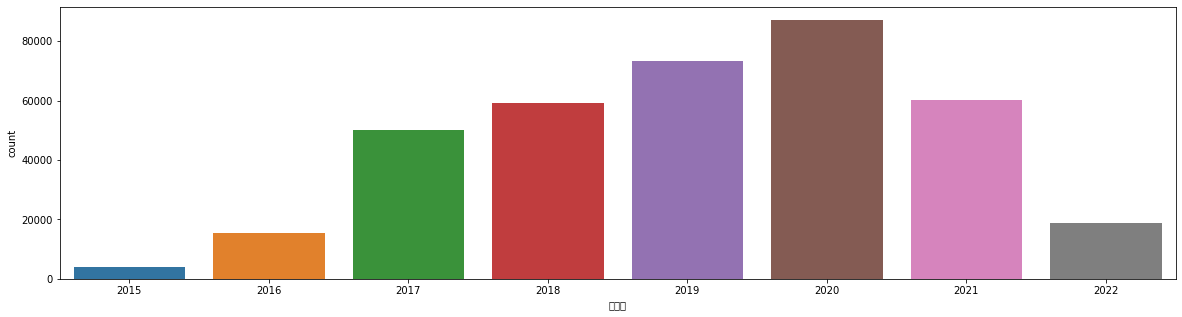

In [122]:
plt.figure(figsize=(20,5))
sns.countplot(x=r_u_data['등록일'].dropna().dt.year)
plt.show()

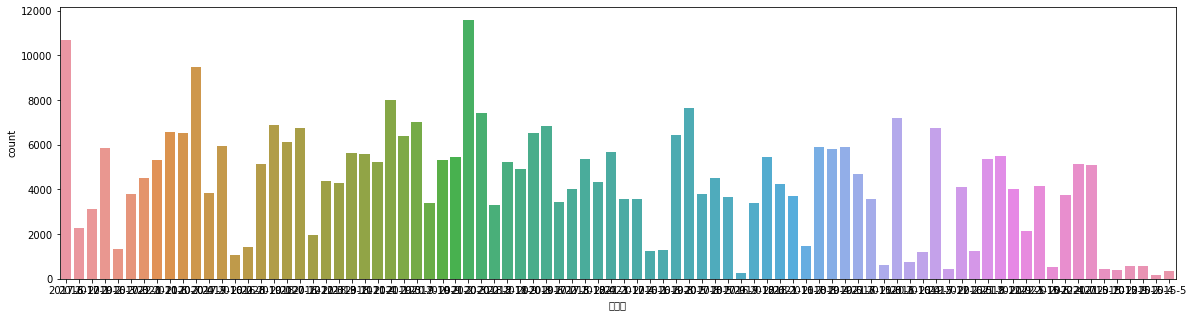

In [124]:
plt.figure(figsize=(20,5))
sns.countplot(x=r_u_data['등록일'].dropna().dt.year.astype(str)+'-'+r_u_data['등록일'].dropna().dt.month.astype(str))
plt.show()

In [93]:
r_u_data

,레시피_아이디,유저_아이디,레시피_유저_순번,별점,등록일,내용,이미지
0,100014,77253045,1,5,2017-06-08 19:24:49,레시피대로 따라서 맛있게먹 고있어요~~^^감사합니다,NaN
1,1000637,ina521,1,5,2017-06-11 11:41:00,레시피감사해요잘만들어먹었네요^^,NaN
2,1001360,khea0628,1,5,2017-06-09 12:24:56,너무 맛있게 해먹었습니다. 양도 푸짐하고.. 국물도 끝내주고... 영양만점인듯해요당...,NaN
3,1001902,18187133,1,5,2016-12-23 17:17:45,지금 만드는중인데. 맛있을것 같아요,NaN
4,1002049,80221089,1,3,2017-01-19 07:21:09,오늘 만들어봤는데 간단하고 재료도 많이 필요없어서 노무 좋았어요! 크림이 너무 많았...,NaN
...,...,...,...,...,...,...,...
368524,6908390,10251040,9,5,2020-06-01 12:58:02,간단하고 맛도 좋아요,NaN
368525,6908390,jeungi4860,10,5,2019-07-09 12:16:53,잘만들어먹엇어여~,NaN
368526,6908390,41379274,11,5,2020-09-28 21:28:38,잘 해먹었습니다^^,NaN
368527,6908397,26773485,1,5,2020-01-31 08:27:02,비쥬얼 좋아요 잘먹었습니다,NaN


In [80]:
test

,레시피_아이디,유저_아이디,레시피_유저_순번,별점,등록일,내용,이미지
0,100014,77253045,1,5,2017-06-08 19:24:49,레시피대로 따라서 맛있게먹 고있어요~~^^감사합니다,NaN
1,1000637,ina521,1,5,2017-06-11 11:41:00,레시피감사해요잘만들어먹었네요^^,NaN
2,1001360,khea0628,1,5,2017-06-09 12:24:56,너무 맛있게 해먹었습니다. 양도 푸짐하고.. 국물도 끝내주고... 영양만점인듯해요당...,NaN
3,1001902,18187133,1,5,2016-12-23 17:17:45,지금 만드는중인데. 맛있을것 같아요,NaN
4,1002049,80221089,1,3,2017-01-19 07:21:09,오늘 만들어봤는데 간단하고 재료도 많이 필요없어서 노무 좋았어요! 크림이 너무 많았...,NaN
...,...,...,...,...,...,...,...
368524,6908390,10251040,9,5,2020-06-01 12:58:02,간단하고 맛도 좋아요,NaN
368525,6908390,jeungi4860,10,5,2019-07-09 12:16:53,잘만들어먹엇어여~,NaN
368526,6908390,41379274,11,5,2020-09-28 21:28:38,잘 해먹었습니다^^,NaN
368527,6908397,26773485,1,5,2020-01-31 08:27:02,비쥬얼 좋아요 잘먹었습니다,NaN


In [68]:
test'0000-00-00 00:00:00'

,레시피_아이디,유저_아이디,레시피_유저_순번,별점,등록일,내용,이미지
0,100014,77253045,1,5,2017-06-08 19:24:49,레시피대로 따라서 맛있게먹 고있어요~~^^감사합니다,NaN
1,1000637,ina521,1,5,2017-06-11 11:41:00,레시피감사해요잘만들어먹었네요^^,NaN
2,1001360,khea0628,1,5,2017-06-09 12:24:56,너무 맛있게 해먹었습니다. 양도 푸짐하고.. 국물도 끝내주고... 영양만점인듯해요당...,NaN
3,1001902,18187133,1,5,2016-12-23 17:17:45,지금 만드는중인데. 맛있을것 같아요,NaN
4,1002049,80221089,1,3,2017-01-19 07:21:09,오늘 만들어봤는데 간단하고 재료도 많이 필요없어서 노무 좋았어요! 크림이 너무 많았...,NaN
...,...,...,...,...,...,...,...
368524,6908390,10251040,9,5,2020-06-01 12:58:02,간단하고 맛도 좋아요,NaN
368525,6908390,jeungi4860,10,5,2019-07-09 12:16:53,잘만들어먹엇어여~,NaN
368526,6908390,41379274,11,5,2020-09-28 21:28:38,잘 해먹었습니다^^,NaN
368527,6908397,26773485,1,5,2020-01-31 08:27:02,비쥬얼 좋아요 잘먹었습니다,NaN


In [81]:
test[test['레시피_아이디'] == 6832339]

,레시피_아이디,유저_아이디,레시피_유저_순번,별점,등록일,내용,이미지
48595,6832339,ashford,1,5,,처음인데 식구들이 다 조아하네요 밥솥이 비었어요 벌써. 나중에 소고기 볶은 것을 첨...,https://recipe1.ezmember.co.kr/cache/review/20...
48596,6832339,90695444,2,5,2015-08-19 19:56:15,무지개에요 감사의마음,https://recipe1.ezmember.co.kr/cache/review/20...
48597,6832339,71365547,3,5,2015-11-04 18:45:48,아이들 먹기 좋아요~~^^,https://recipe1.ezmember.co.kr/cache/review/20...


In [83]:
test[test['레시피_아이디'] == 6837886]['등록일'][121185]

''

In [60]:
r_u_data[r_u_data['등록일'] == '0000-00-00 00:00:00']

,레시피_아이디,유저_아이디,레시피_유저_순번,별점,등록일,내용,이미지
48595,6832339,ashford,1,5,0000-00-00 00:00:00,처음인데 식구들이 다 조아하네요 밥솥이 비었어요 벌써. 나중에 소고기 볶은 것을 첨...,https://recipe1.ezmember.co.kr/cache/review/20...
121185,6837886,ashford,4,5,0000-00-00 00:00:00,콩나물 무침 조금만 만들려고 했는데 소금을 너무 마니 넣어 짜져서 할수 없이 또 콩...,https://recipe1.ezmember.co.kr/cache/review/20...


In [52]:
r_i_data

,레시피_아이디,재료_아이디,재료_이름,레시피_재료_순번,내용
0,1000240,499,소고기 다짐육,1,300그램
1,1000240,440,빵가루,2,50그램
2,1000240,219,노른자,3,1개
3,1000240,2,양파 작은것,4,1/2개
4,1000240,NaN,기꼬망마리네이트소스,5,NaN
...,...,...,...,...,...
1531233,6908398,424,찬밥,4,3인분
1531234,6908398,46,콩나물,5,1/2봉지
1531235,6908398,481,굴소스,6,3큰술
1531236,6908398,666,참기름,7,1큰술


In [5]:
u_meta

,유저_아이디,유저_닉네임,유저_이미지
0,0000choi,꼬마은영,https://recipe1.ezmember.co.kr/cache/rpf/2014/...
1,000820,커피쪼앙,https://recipe1.ezmember.co.kr/img/df/pf_100_1...
2,001212jm,조수현,https://recipe1.ezmember.co.kr/cache/rpf/2014/...
3,001212jm,정민맘,https://recipe1.ezmember.co.kr/cache/rpf/2014/...
4,002joy,레아맘,https://recipe1.ezmember.co.kr/img/df/pf_100_1...
...,...,...,...
136299,zzz3450,자매마밍,https://recipe1.ezmember.co.kr/img/df/pf_100_1...
136300,zzz6230,su,https://recipe1.ezmember.co.kr/img/df/pf_100_1...
136301,zzzqhdud,ㅎㅎ,https://recipe1.ezmember.co.kr/img/df/pf_100_1...
136302,zzzzz,후요,https://recipe1.ezmember.co.kr/img/df/pm_100_1...


In [3]:
r_meta

,레시피_아이디,조회수,레시피_메인이미지,유저_아이디,제목,등록일,수정일,요약,인원수,소요시간,난이도
0,13654,4115,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,바나나 고구마 셔벗,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
1,13655,2165,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,생선수프,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
2,13656,1777,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,밤대추 미음,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
3,13657,2011,https://recipe1.ezmember.co.kr/cache/recipe/20...,cools,바닐라 견과류 아이스크림,2005-06-10,2005-06-10,NaN,NaN,NaN,NaN
4,13998,6107,https://recipe1.ezmember.co.kr/cache/recipe/20...,magicgirl,감자스프,2005-06-15,2005-06-15,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
176454,6979664,47,https://recipe1.ezmember.co.kr/cache/recipe/20...,dudfhr79,훈제오리고기로 만드는 훈제오리주물럭 레시피!,NaN,2022-05-20,훈제오리고기로 만드는 훈제오리주물럭 레시피 입니다.,3인분,30분 이내,초급
176455,6979665,29,https://recipe1.ezmember.co.kr/cache/recipe/20...,jylhee070467,최고의 요리비결 부추전,2022-05-20,2022-05-20,"부추는 비타민의 보고라고 불릴 정도로 비타민 A, B1, B2, C 등이 풍부하고 ...",1인분,30분 이내,아무나
176456,6979666,14,https://recipe1.ezmember.co.kr/cache/recipe/20...,soylee1015,꽃 요리 아카시아꽃 튀김 향긋한 튀김,2022-05-20,2022-05-20,산에서 딴 아카시아 꽃으로 아카시아 꽃 튀김을 \n만들어 봅니다. 모양도 향기도 좋...,2인분,10분 이내,아무나
176457,6979667,49,https://recipe1.ezmember.co.kr/cache/recipe/20...,62929808,시원한 광어물회 맛있게 간단히 만들어 보세요.,2022-05-20,2022-05-20,시원한 광어물회 '이것' 넣어서 간편하고 맛있게 만들어 보세요.,1인분,15분 이내,아무나


In [ ]:
u_meta